# Task 1 – Context

This task sets the stage for the subsequent tasks as it determines the context for the experiments. For
that purpose:
1. You present a real scenario or a (realistic) fictitious situation, in which you are the data scientist.
You propose to solve a classification or regression problem and want to convince a customer
to greenlight your project.

The churn rate in businesses describes the percentage of customers leaving a subscription service over a time period. For the companies that offer these subsciption models it is common practize to monitor customer behavior to determine the likelihood of a customer to cancel their subscription to then offer special benefits so keep those customers that have a high dropout risk rate and keep the churn rate low. Similarly Universities offer a special type of subscription model in which Students pay their tuition fee to participate in courses and achieve degrees. By determining Students at high risks early, universities can intervene to support these students and offer targeted support. The Dataset presented in this project includes different features for students from different universities around the world and if they dropped out of university at the end of a normal course duration. Analysing this dataset and building a model to predict students that are likely to dropout can help universities to intervene and support students before they actually dropout.


2. You explain the value (monetary or otherwise) of solving the problem and what the customer
could do with the model you train (if successful).

Solving this task of correctly classifying student dropout to support them as soon as possible helps the students as well as the University. 
Preventing dropouts will increase the tuition revenue and keeps the costs that comes with the enrollment of new students low. Especially private Universities that are highly dependend on the students tuitions could greatly benefit from these predictions. 
For the students that might be classified as a potential dropout, these studentes could also benefit because they might receive personalied support, like tutoring, counseling, or financial support. This approach can lead to better academic performance and a higher likelihood of successfully completing their education. 

3. Name two quality criteria that you will use in the following tasks to evaluate your models.
Explain your choice!

**F1 dropout** (calculated on the dropout class): Dropout prediction often involves an imbalance between "dropout" and "non-dropout" cases where there are more of the latter. The F1 score balances precision and recall, which makes it a good metric for imbalanced datasets and ensuring the model accurately identifies at-risk students. The F1 score is calculated as follows: 
$$F1 = \frac{2 \cdot TP}{2 \cdot TP + FP + FN}$$

Where:
- **TP**: True Positives
- **FP**: False Positives
- **FN**: False Negatives

**Accuracy**: While the F1 score already includes class imbalances, the accuracy score for classification will give a broader measurment of the models actual performance.

dataset: M.V.Martins, D. Tolledo, J. Machado, L. M.T. Baptista, V.Realinho. (2021) "Early prediction of student’s performance in higher education: a case study" Trends and Applications in Information Systems and Technologies, vol.1, in Advances in Intelligent Systems and Computing series. Springer. DOI: 10.1007/978-3-030-72657-7_16

# Task 2 – The Data
Load and present a dataset (respect the conditions in Section 2). This will be the raw data, that you’ll
exploit in the subsequent tasks.


• Explain how the dataset is suitable for the project from Task 1

In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

In [3]:
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 

# Combine the features and target into one DataFrame
df = pd.concat([X, y], axis=1)
df.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Data Description

The dataset consists of **4424 students** from different University around the world. There are **37 variables** measured for each student, with no missing values. These variables could be grouped like this:

## Demographic Variables
- **Age**: The student's age.  
- **Gender**: Male or female.  
- **Parental Information**: Includes education level and employment status.  


## Academic Variables
- **Previous Education**: Information such as high school GPA or type of diploma.  
- These variables help contextualize the students' preparedness for university-level studies.

## Behavioral Variables
- **Credits Received Each Semester**: Number of credits earned.  
- **Grades**: Academic performance metrics.  
- **Attendance Records**: Tracking student attendance in classes.  
- These variables reflect the students' engagement and performance throughout their degree.

## Other Variables
- **Extracurricular Activities**: Participation in clubs, sports, or other activities.  
- **Use of Academic Resources**: Frequency of library visits or use of academic tools.  
- **Course Enrollment Details**: Information about the courses students are taking.  
- These factors capture the broader aspects of student life and involvement in campus activities.

## Target Variable
The target variable categorizes students into three possible outcomes:
- **Dropout**: Students who did not complete their degree.  
- **Graduate**: Students who successfully completed their degree.  
- **Enrolled**: Students who are still actively pursuing their degree.  

This comprehensive dataset provides a strong foundation for modeling dropout risks and understanding the factors influencing student success.

___

Further down, the values of each feature are described in detail.


| **Feature**                                     | **Description**                                                                                                                                                 |
|-------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Marital Status**                              | Student's marital status: 1: Single, 2: Married, 3: Widower, 4: Divorced, 5: Facto Union, 6: Legally Separated                                               |
| **Application Mode**                            | Admission process type: 1: 1st phase general, 2: Ordinance 612/93, 57: International change                                                                  |
| **Application Order**                           | Priority of course choice: 0: First choice, 9: Last choice                                                                                                      |
| **Course**                                      | Enrolled course (e.g., 33: Biofuel Tech, 9130: Equinculture).                                                                                                  |
| **Daytime/Evening Attendance**                  | Course schedule: 1: Daytime, 0: Evening                                                                                                                        |
| **Previous Qualification**                      | Student’s highest education level before enrolling: 1: Secondary education, 5: Doctorate                                                                    |
| **Previous Qualification (Grade)**              | Grade from the previous qualification (0-200).                                                                                                                 |
| **Nationality**                                 | Student’s nationality (e.g., 1: Portuguese, 105: Russian).                                                                                                    |
| **Mother's Qualification**                      | Mother's highest education level (e.g., 1: Secondary, 44: Doctorate).                                                                                         |
| **Father's Qualification**                      | Father's highest education level (e.g., 1: Secondary, 44: Doctorate).                                                                                         |
| **Mother's Occupation**                         | Mother's occupation category (e.g., 1: Legislator, 9: Unskilled worker).                                                                                      |
| **Father's Occupation**                         | Father's occupation category (e.g., 1: Legislator, 9: Unskilled worker).                                                                                      |
| **Admission Grade**                             | Grade used for university admission (0-200).                                                                                                                  |
| **Displaced**                                   | Whether the student lives far from their residence: 1: Yes, 0: No                                                                                           |
| **Educational Special Needs**                   | Presence of special education needs: 1: Yes, 0: No                                                                                                           |
| **Debtor**                                      | Tuition fee debt status: 1: Yes, 0: No                                                                                                                        |
| **Tuition Fees Up to Date**                     | Tuition fee payment status: 1: Yes, 0: No                                                                                                                     |
| **Gender**                                      | Student’s gender: 1: Male, 0: Female                                                                                                                           |
| **Scholarship Holder**                          | Whether the student receives a scholarship: 1: Yes, 0: No                                                                                                    |
| **Age at Enrollment**                           | Age of the student when enrolling.                                                                                                                             |
| **International**                               | Whether the student is an international student: 1: Yes, 0: No                                                                                              |
| **Curricular Units 1st Sem (Credited)**         | Units credited in the first semester.                                                                                                                          |
| **Curricular Units 1st Sem (Enrolled)**         | Units enrolled in the first semester.                                                                                                                          |
| **Curricular Units 1st Sem (Evaluations)**      | Units with evaluations in the first semester.                                                                                                                 |
| **Curricular Units 1st Sem (Approved)**         | Units approved in the first semester.                                                                                                                          |
| **Curricular Units 1st Sem (Grade)**            | Average grade in the first semester (0-20).                                                                                                                    |
| **Curricular Units 1st Sem (Without Evaluations)**| Units without evaluations in the first semester.                                                                                                              |
| **Curricular Units 2nd Sem (Credited)**         | Units credited in the second semester.                                                                                                                         |
| **Curricular Units 2nd Sem (Enrolled)**         | Units enrolled in the second semester.                                                                                                                         |
| **Curricular Units 2nd Sem (Evaluations)**      | Units with evaluations in the second semester.                                                                                                                |
| **Curricular Units 2nd Sem (Approved)**         | Units approved in the second semester.                                                                                                                         |
| **Curricular Units 2nd Sem (Grade)**            | Average grade in the second semester (0-20).                                                                                                                   |
| **Curricular Units 2nd Sem (Without Evaluations)**| Units without evaluations in the second semester.                                                                                                             |
| **Unemployment Rate**                           | Unemployment rate during enrollment (%).                                                                                                                     |
| **Inflation Rate**                              | Inflation rate during enrollment (%).                                                                                                                        |
| **GDP**                                         | GDP during enrollment.                                                                                                                                         |

### Target Description:

Traget: Final student status: Dropout, Enrolled, Graduate                                                                                                             


___
# Task 3 – IDA
Conduct an initial data analysis.

• Present some relevant statistical properties that inform the reader about the dataset or that are
relevant for your project.

___

In [4]:
# Display statistical properties for numerical features
print(X.describe())

# Display value counts for the target variable
print(y['Target'].value_counts())

       Marital Status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance  Previous qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25%                

___
# Task 4 – EDA and Preprocessing
Bring the dataset into the form that you need for the experiments.

• Explore the data and conduct necessary transformations.

• Visualize or summarize aspects of the dataset (statistics, ranges, distributions, . . . ).

• If necessary, use different means of preprocessing until the dataset is suitable.

• If you change data, do not forget to present and summarize relevant properties and distributions
of the result.
___

In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Data cleaning:

In [6]:
# Rename columns to match the correct names
df.rename(columns = {"Nacionality": "Nationality", 
                           "Mother's qualification": "Mother_qualification", 
                           "Father's qualification": "Father_qualification", 
                           "Mother's occupation": "Mother_occupation",
                           "Father's occupation": "Father_occupation", 
                           "Age at enrollment": "Age"}, inplace = True)

# Replace spaces with underscores in column names
df.columns = df.columns.str.replace(' ', '_')

# Convert specified columns to categorical
categorical_features = ['Marital_Status', 'Application_mode', 'Application_order', 'Course',
                        'Daytime/evening_attendance', 'Previous_qualification', 'Nationality',
                        'Mother_qualification', 'Father_qualification', 'Mother_occupation',
                        'Father_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
                        'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International']

# Ensure the columns dfist in the dataframe before converting to categorical
categorical_features = [col for col in categorical_features if col in df.columns]
df[categorical_features] = df[categorical_features].astype('category')



In [7]:
# Create a new column to group "Graduate" and "Enrolled" together
y.loc[:, 'Target_Grouped'] = y['Target'].apply(lambda x: 'Graduate/Enrolled' if x != 'Dropout' else 'Dropout')

# Plot the distribution of the target variable with separate colors for "Graduate" and "Enrolled"
fig = px.histogram(y, x='Target_Grouped', color='Target', title='Distribution of Dropout vs Graduate/Enrolled',
                   color_discrete_sequence=['#EF553B', '#00CC96', '#636EFA'], barmode='stack')
fig.show()


C:\Users\TimPr\AppData\Local\Temp\ipykernel_53684\2855801828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[:, 'Target_Grouped'] = y['Target'].apply(lambda x: 'Graduate/Enrolled' if x != 'Dropout' else 'Dropout')


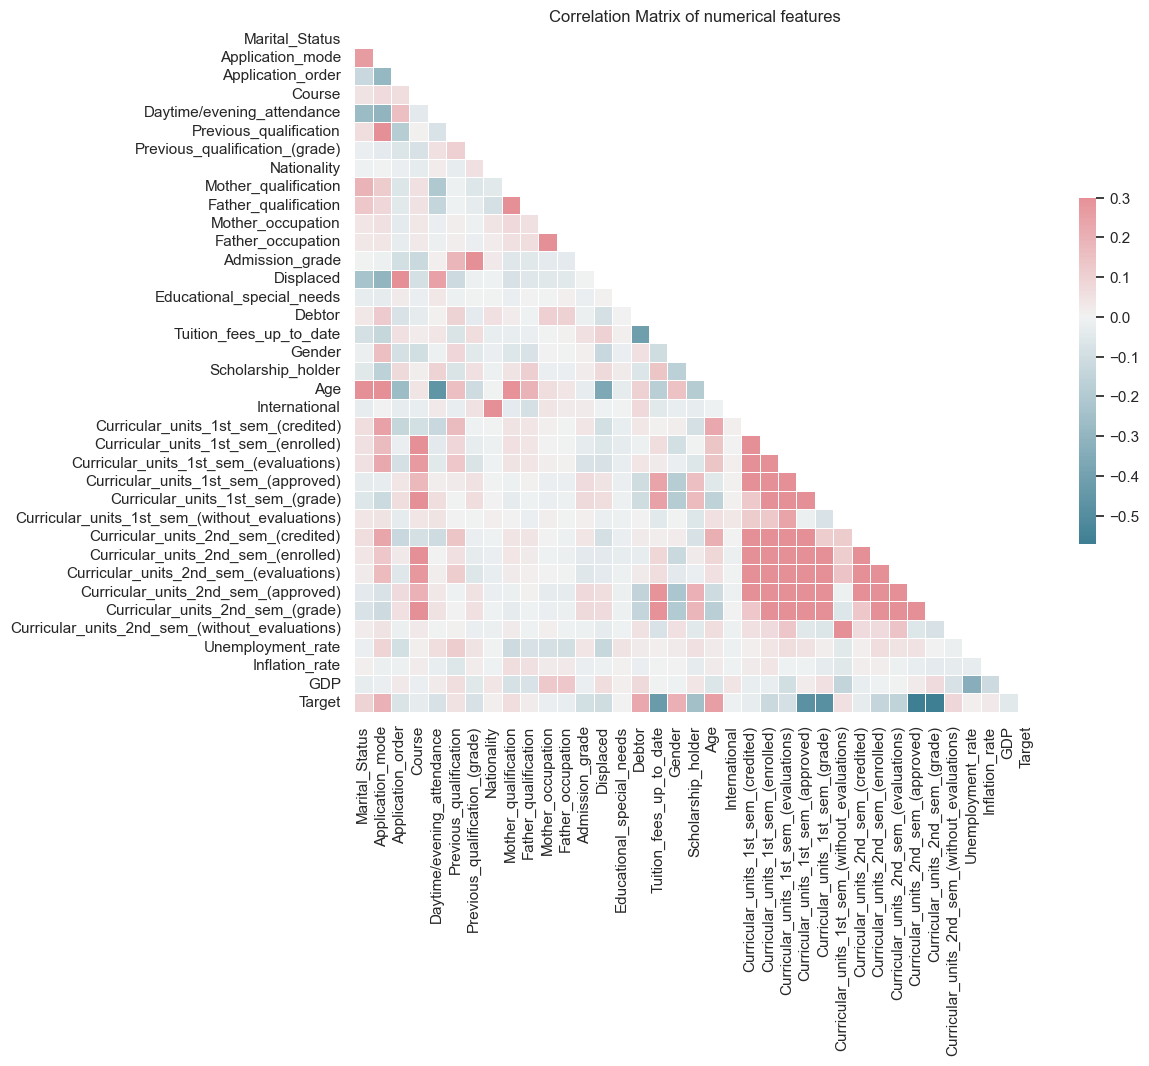

In [8]:
# Encode the target variable
df['Target'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the aesthetic style of the plots
sns.set(style="white")

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)

plt.title('Correlation Matrix of numerical features')
plt.show()

In [9]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Calculate the correlations with the target variable
correlations = correlation_matrix['Target'].drop('Target').sort_values(ascending=False)

# Print the five highest correlations with the target variable
print("Five highest correlations with target:")
print(correlations.head(5))

# Print the five lowest correlations with the target variable
print("\nFive lowest correlations with target:")
print(correlations.tail(5))

Five highest correlations with target:
Age                 0.254215
Debtor              0.229407
Gender              0.203983
Application_mode    0.198458
Marital_Status      0.093712
Name: Target, dtype: float64

Five lowest correlations with target:
Tuition_fees_up_to_date               -0.429149
Curricular_units_1st_sem_(approved)   -0.479112
Curricular_units_1st_sem_(grade)      -0.480669
Curricular_units_2nd_sem_(approved)   -0.569500
Curricular_units_2nd_sem_(grade)      -0.571792
Name: Target, dtype: float64


In [33]:
# Get dummies for the categorical features
df_with_dummies = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Calculate the correlation matrix using df_with_dummies
correlation_matrix_dummies = df_with_dummies.corr()

# Calculate the correlations with the target variable
correlations_dummies = correlation_matrix_dummies['Target'].drop('Target').sort_values(ascending=False)

# Print the highest correlations with the target variable
print("Five highest correlations with target (using dummies):")
print(correlations_dummies.head(15))

# Print the lowest correlations with the target variable
print("\nFive lowest correlations with target (using dummies):")
print(correlations_dummies.tail(15))


Five highest correlations with target (using dummies):
Age                          0.254215
Application_mode_39          0.231699
Debtor_1                     0.229407
Gender_1                     0.203983
Mother_qualification_34      0.155484
Father_qualification_34      0.138755
Previous_qualification_19    0.133933
Application_mode_7           0.111978
Mother_occupation_90         0.110620
Course_9991                  0.101295
Father_occupation_90         0.101075
Previous_qualification_3     0.100485
Marital_Status_2             0.099048
Course_9119                  0.094175
Course_9130                  0.090145
Name: Target, dtype: float64

Five lowest correlations with target (using dummies):
Daytime/evening_attendance_1             -0.080499
Course_9238                              -0.087361
Curricular_units_1st_sem_(evaluations)   -0.090125
Admission_grade                          -0.095806
Displaced_1                              -0.107232
Curricular_units_1st_sem_(enrolled) 

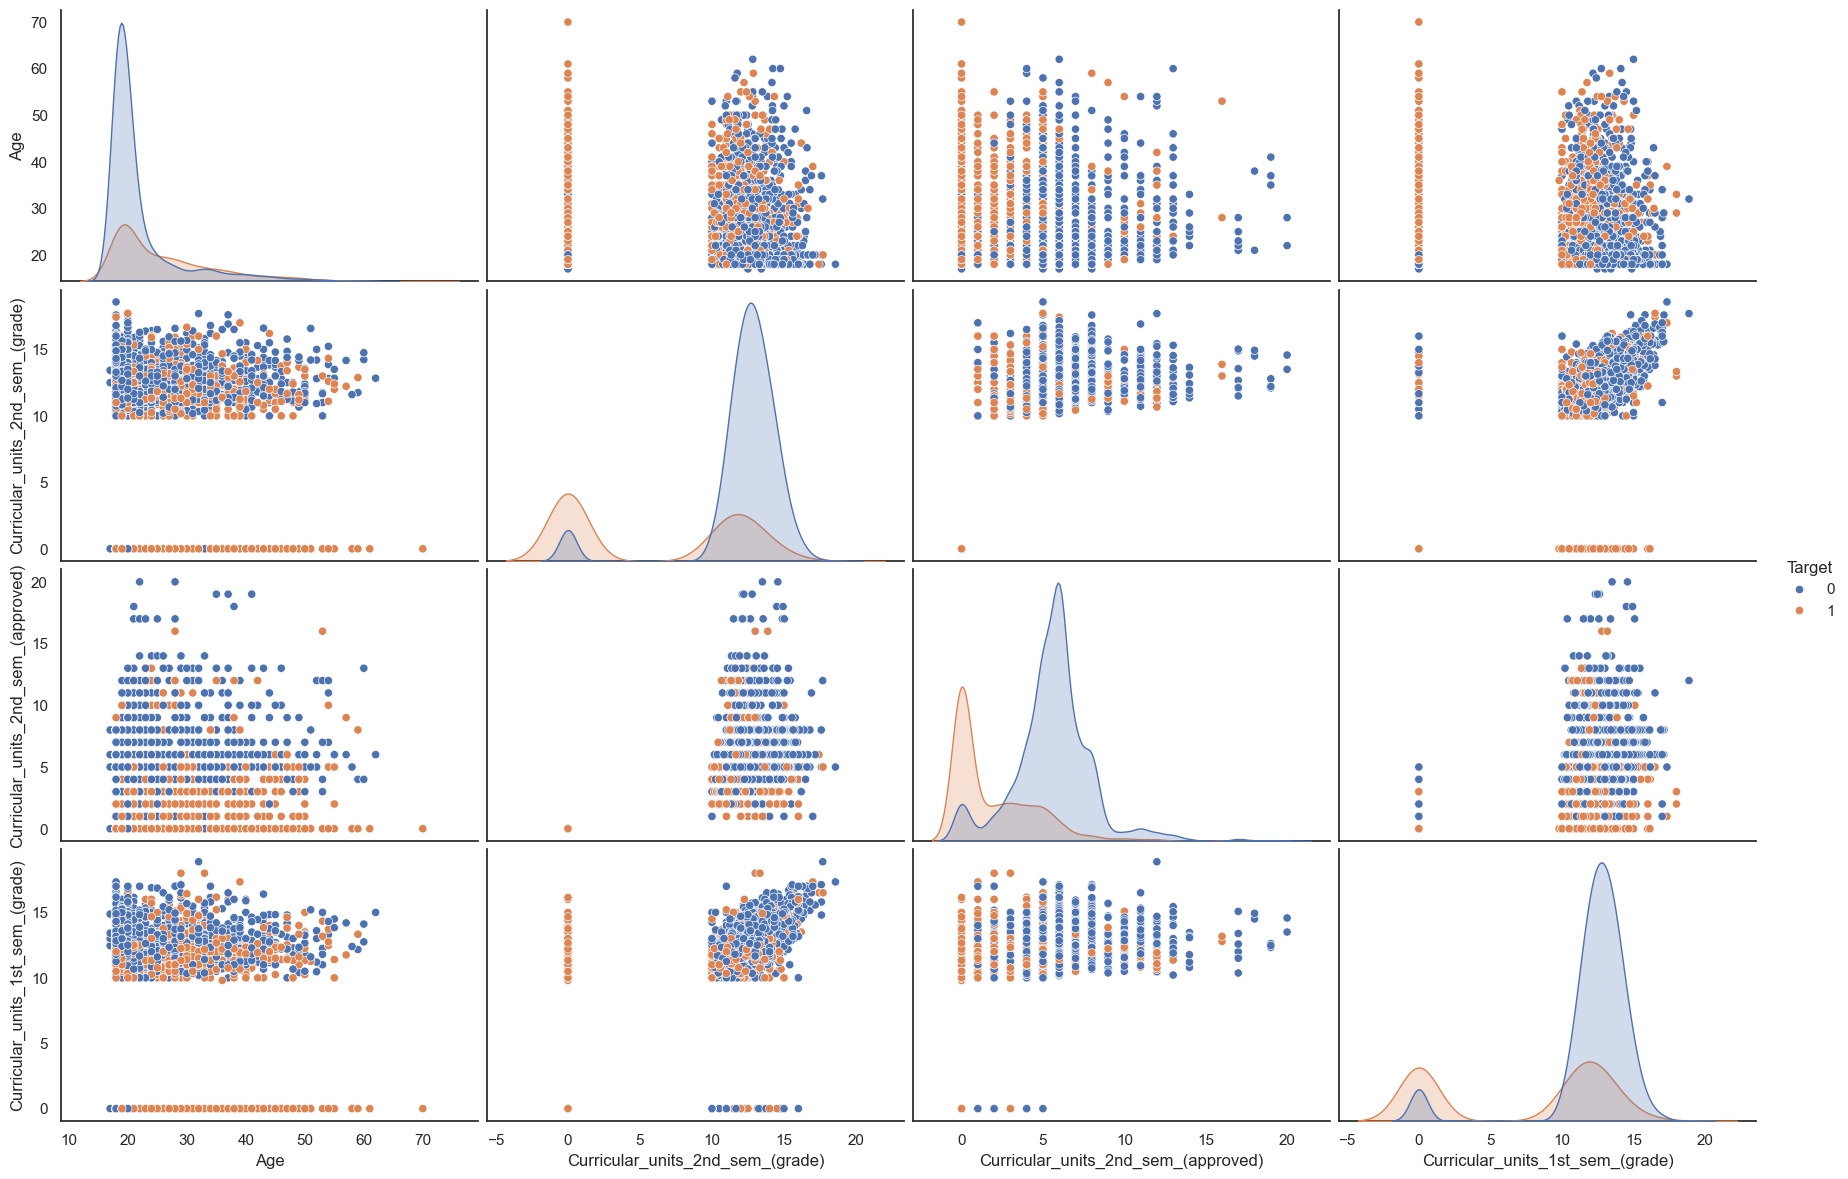

In [11]:
# Select the features for the pairplot
selected_features_for_pairplot = ['Age', 'Debtor', 'Gender', 'Curricular_units_2nd_sem_(grade)', 'Curricular_units_2nd_sem_(approved)', 'Curricular_units_1st_sem_(grade)', 'Target']

# Create a pairplot with larger figure size
sns.pairplot(df[selected_features_for_pairplot], hue='Target', height=3, aspect=1.5)
plt.show()

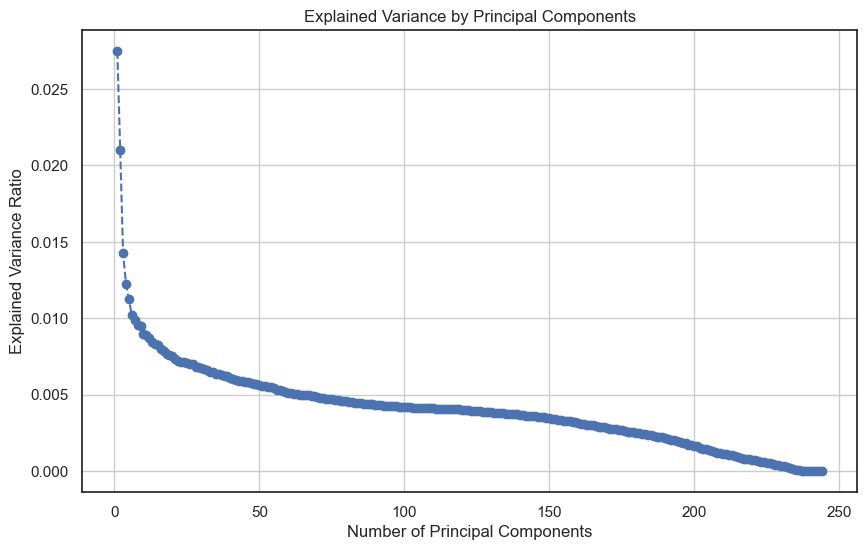

In [12]:
# Standardize the data before applying PCA

# Separate features and target
X_dummies = df_with_dummies.drop(columns=['Target'])
y_dummies = df_with_dummies['Target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dummies)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [13]:
# Calculate the eigenvalues from the explained variance
eigenvalues = pca.explained_variance_

# Apply the Kaiser Criterion
kaiser_criterion = eigenvalues > 1

# Count the number of components that meet the criterion
num_components_kaiser = np.sum(kaiser_criterion)

print(f"Number of components to retain according to the Kaiser Criterion: {num_components_kaiser}")

Number of components to retain according to the Kaiser Criterion: 110


In [14]:
# Transform the data using the first 110 principal components
X_pca = pca.transform(X_scaled)[:, :110]

# Create a new DataFrame with the PCA components
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(110)])

# Display the new DataFrame
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110
0,-6.283222,-1.535752,-0.315547,0.684295,-0.038247,0.297288,0.253482,0.781502,-0.890616,1.190989,...,-0.235192,-1.054530,-0.152194,-0.624267,0.311583,-0.529823,-0.800248,0.074818,0.196077,-0.276364
1,-0.229666,-1.212774,3.754628,-0.197720,4.547440,-1.568669,-0.961428,-0.724723,-0.045845,-0.774444,...,0.127509,-0.254129,-0.559737,0.074495,-0.520447,-0.058973,0.225821,0.077779,0.091229,-0.041063
2,-3.681283,0.710772,-1.400622,-0.276760,0.439744,-0.346036,0.262830,1.431337,-0.455023,0.770966,...,0.730970,-0.756588,-0.155235,-0.157588,0.074576,-0.166484,0.058534,0.344679,0.181695,-0.009712
3,0.075853,-2.334844,-1.659118,0.923570,-0.064083,-0.770897,-0.157654,-0.022936,-0.184080,-0.439135,...,-0.187072,-0.350077,0.455479,0.164869,0.033801,0.113089,-0.348787,0.152463,0.001313,-0.070188
4,0.479611,4.552416,-2.535292,-1.514201,0.323787,-0.942415,0.394697,-1.973511,-0.877266,0.012854,...,-0.674332,0.379647,-0.457044,-0.314269,0.293459,0.266962,-0.312007,0.210772,0.117036,-0.251590


In [ ]:
# Calculate the p-values for the correlations with the target variable
p_values = df_with_dummies.apply(lambda x: pearsonr(x, df_with_dummies['Target'])[1])

# Select columns with p-value less than 0.05, excluding the Target variable
selected_columns = p_values[p_values < 0.10].index.drop('Target')

# Create a new DataFrame with the selected columns
df_selected = df_with_dummies[selected_columns]

# Display the new DataFrame
df_selected.head()


,Previous_qualification_(grade),Admission_grade,Age,Curricular_units_1st_sem_(credited),Curricular_units_1st_sem_(enrolled),Curricular_units_1st_sem_(evaluations),Curricular_units_1st_sem_(approved),Curricular_units_1st_sem_(grade),Curricular_units_1st_sem_(without_evaluations),Curricular_units_2nd_sem_(credited),...,Father_occupation_90,Father_occupation_99,Father_occupation_144,Father_occupation_171,Father_occupation_192,Displaced_1,Debtor_1,Tuition_fees_up_to_date_1,Gender_1,Scholarship_holder_1
0,122.0,127.3,20,0,0,0,0,0.000000,0,0,...,False,False,False,False,False,True,False,True,True,False
1,160.0,142.5,19,0,6,6,6,14.000000,0,0,...,False,False,False,False,False,True,False,False,True,False
2,122.0,124.8,19,0,6,0,0,0.000000,0,0,...,False,False,False,False,False,True,False,False,True,False
3,122.0,119.6,20,0,6,8,6,13.428571,0,0,...,False,False,False,False,False,True,False,True,False,False
4,100.0,141.5,45,0,6,9,5,12.333333,0,0,...,False,False,False,False,False,False,False,True,False,False


After initially correcting some of the columns names and changing, I took an initial look at the target variable distribution.The first figure shows that we have class imbalance since we have less dropouts then enrolled or graduated students. This class imbalance is something we have to later keep in mind for the quality criteria we choose as well as the stratification that is to come. For this project I encoded Dropout as 1 and the other two variables as 0 since we only want to predict if a student drops out or not. Further I plotted the correlation matrix of the numeric variables to get an overview of possible connections. After this I dummy encoded all the categorical variables as well to look at those correlations with the target variable. This resulted in 245 columns which is almost 7x the initial data size. Some of these have high positive correlation with the Target variable like the age, the application mode, the gender or if the person still owed money. Many of the highest negative correlations related to the students performance during the second semester. If they took courses, if they got the credits or even a grade. This makes sense because if a person already dropped out earlier then the second semester this will show in these features. Too keep the later computation manageable some of the variables with a lower correlation of .1 were dropped since it is assumed that many of the new dummy encoded variables like the parental qualification might not be important information for the model. 

___
# Task 5 – Baselines and Learning Curves
Use a simple cross validation to evaluate baselines and to draw learning curves.

• Setup a simple cross validation for evaluating algorithms. Use the quality measures from
Task 1.

• Determine an appropriate simple baseline (no trained model) for your task.

• Select twoML algorithms 𝐴1 and 𝐴2 from the lectures (or their regression counterparts) and
use their implementations in scikit-learn.

• Briefly discuss relevant dataset transformations that have to be used with each of the algorithms.
Apply them in the all tasks where necessary!

• For each algorithm (𝐴1 and 𝐴2) select exactly two hyperparameters. These will be the
hyperparameters you optimize. Leave the others at default settings.

• In the simple cross validation, evaluate the baselines and build learning curves (separately for
𝐴1 and 𝐴2) with the respective two chosen hyperparameters.

• Create one visualization for each algorithm, showing the performance in different hyper-
parametrizations and comparing it to the baseline.

• Interpret the results
___

In [16]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score
import numpy as np
import time
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold

## Evaluation Function:

We set up a simple evaluation function that takes in the classification model, the features, the targets and the number of outer folds, which is set to 10 if not specified as well as the number of repeats, that is also set to 10. the outer cross validation also stratifies the splits which is important because of the initial class imbalance that we observed. The function then returns the earlier discussed Accuracy metrics: F1 Score and Accuracy

In [17]:
# def evaluate_model(model, X, y, cv=2):
#     # Define the scoring metric for accuracy
#     scoring_accuracy = make_scorer(accuracy_score)
    
#     # Perform cross-validation for accuracy
#     scores_accuracy = cross_val_score(model, X, y, cv=cv, scoring=scoring_accuracy)
    
#     # Print the accuracy scores
#     print(f"Accuracy scores for each fold: {scores_accuracy}")
#     print(f"Mean accuracy: {scores_accuracy.mean()}")
    
#     scoring_f1 = make_scorer(f1_score, pos_label=1)
#     scores_f1 = cross_val_score(model, X, y, cv=cv, scoring=scoring_f1)

#     # Print the F1 scores for class 1
#     print(f"F1 scores for class 1 for each fold: {scores_f1}")
#     print(f"Mean F1 score for class 1: {scores_f1.mean()}")

In [18]:
def evaluate_model(model, X, y, cv=10, nr=10):
    # Define scoring metrics
    scoring_accuracy = make_scorer(accuracy_score)
    scoring_f1 = make_scorer(f1_score, pos_label=1)

    # Define StratifiedKFold with 3 splits and shuffle
    skf = RepeatedStratifiedKFold(n_splits=cv, n_repeats=nr, random_state=1, stratify=y)
    
    # Perform cross-validation for accuracy and F1 scores
    scores_accuracy = cross_val_score(model, X, y, cv=skf, scoring=scoring_accuracy)
    scores_f1 = cross_val_score(model, X, y, cv=skf, scoring=scoring_f1)
    
    return scores_accuracy, scores_f1


## Baseline Model
For the Baseline model we set up two simple models that predict all dropouts or no dropouts for the entire test set. I choose two simple models that predicts both classes to get a "good" baseline F1 score as well as a "good" accuracy that future models should beat.

In [19]:
# Baseline model that guesses all dropouts
class AllDropoutsClassifier:
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.ones(X.shape[0])
    
    def get_params(self, deep=False):
        return {}
    
    def set_params(self, **params):
        return self

# Baseline model that guesses all not dropouts
class AllNotDropoutsClassifier:
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros(X.shape[0])
    
    def get_params(self, deep=False):
        return {}
    
    def set_params(self, **params):
        return self

# Evaluate the baseline model that guesses all dropouts
print("Evaluating baseline model that guesses all dropouts:")
scores_accuracy, scores_f1 = evaluate_model(AllDropoutsClassifier(), df_pca, y_dummies)

# Print the accuracy and F1 scores for the baseline model
print(f"Accuracy scores: {scores_accuracy}")
print(f"Mean accuracy: {scores_accuracy.mean()}")
print(f"F1 scores for class 1: {scores_f1}")
print(f"Mean F1 score for class 1: {scores_f1.mean()}")

# Evaluate the baseline model that guesses all not dropouts
print("\nEvaluating baseline model that guesses all not dropouts:")
scores_accuracy, scores_f1 = evaluate_model(AllNotDropoutsClassifier(), df_pca, y_dummies)

# Print the accuracy and F1 scores for the baseline model
print(f"Accuracy scores: {scores_accuracy}")
print(f"Mean accuracy: {scores_accuracy.mean()}")
print(f"F1 scores for class 1: {scores_f1}")
print(f"Mean F1 score for class 1: {scores_f1.mean()}")


Evaluating baseline model that guesses all dropouts:
Accuracy scores: [0.32135593 0.32135593 0.32089552 0.32135593 0.32135593 0.32089552
 0.32135593 0.32135593 0.32089552 0.32135593 0.32135593 0.32089552
 0.32135593 0.32135593 0.32089552 0.32135593 0.32135593 0.32089552
 0.32135593 0.32135593 0.32089552 0.32135593 0.32135593 0.32089552
 0.32135593 0.32135593 0.32089552 0.32135593 0.32135593 0.32089552]
Mean accuracy: 0.3212024622649466
F1 scores for class 1: [0.48640328 0.48640328 0.48587571 0.48640328 0.48640328 0.48587571
 0.48640328 0.48640328 0.48587571 0.48640328 0.48640328 0.48587571
 0.48640328 0.48640328 0.48587571 0.48640328 0.48640328 0.48587571
 0.48640328 0.48640328 0.48587571 0.48640328 0.48640328 0.48587571
 0.48640328 0.48640328 0.48587571 0.48640328 0.48640328 0.48587571]
Mean F1 score for class 1: 0.48622742456172907

Evaluating baseline model that guesses all not dropouts:
Accuracy scores: [0.67864407 0.67864407 0.67910448 0.67864407 0.67864407 0.67910448
 0.67864407 

## A1: SVM Evaluation 
The first ML algorithm that I am going to evaluate is the Support Vector Machine (SVM) with a polynomial kernel. For this algorithm, it is important to scale the data before training because features with larger values would otherwise impact the computation more without necessarily being more important. Scaling ensures that all features contribute equally to the model by standardizing their ranges.

The two hyperparameter chosen for the algorithm are:
* Polynomial Degree: Determines the complexity of the transformation of the data into a higher-dimensional space. A higher degree allows the model to capture more intricate patterns, but it may also increase the risk of overfitting.
* C Value: C controls the balance between training accuracy and model simplicity. A smaller C favors a simpler model, while a larger C focuses on accurately classifying training data, even if it reduces generalization.



In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve

Evaluating SVM with polynomial kernel of degree 1 and C=0.1:
Accuracy scores: [0.86711864 0.86237288 0.84938942 0.87389831 0.85898305 0.8568521
 0.86440678 0.86983051 0.85210312 0.87254237 0.85423729 0.85617368
 0.85762712 0.85966102 0.86024423 0.85288136 0.86440678 0.86431479
 0.86372881 0.85898305 0.86227951 0.86915254 0.85627119 0.85481682
 0.86711864 0.84813559 0.85006784 0.84677966 0.86847458 0.85956581]
Mean accuracy: 0.8600805832164294
F1 scores for class 1: [0.755      0.74969174 0.72524752 0.77536232 0.73195876 0.7359199
 0.74874372 0.76585366 0.72885572 0.76558603 0.73291925 0.7408313
 0.73880597 0.74221669 0.74692875 0.73110285 0.75062344 0.75247525
 0.74906367 0.74257426 0.74782609 0.75905119 0.74821853 0.72911392
 0.75802469 0.74074074 0.71111111 0.72705314 0.7622549  0.73896595]
Mean F1 score for class 1: 0.7444040353965226


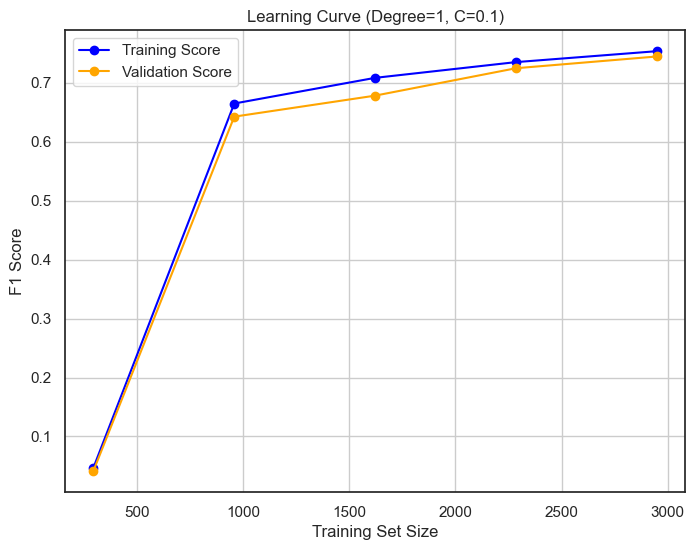



Evaluating SVM with polynomial kernel of degree 1 and C=1:
Accuracy scores: [0.8779661  0.86237288 0.86702849 0.8779661  0.86983051 0.85617368
 0.87457627 0.87389831 0.8568521  0.8779661  0.86711864 0.86499322
 0.86101695 0.86847458 0.87788331 0.87050847 0.86847458 0.86295794
 0.86711864 0.86305085 0.87720488 0.8840678  0.86576271 0.86092266
 0.87728814 0.8779661  0.85549525 0.87322034 0.87254237 0.85888738]
Mean accuracy: 0.8689861785065427
F1 scores for class 1: [0.784689   0.75453446 0.76213592 0.78971963 0.76470588 0.74146341
 0.77737665 0.77697842 0.74173807 0.7826087  0.76385542 0.76167665
 0.75330927 0.76626506 0.7804878  0.76960193 0.76738609 0.75544794
 0.76385542 0.75365854 0.78426698 0.79422383 0.76484561 0.7509113
 0.78426698 0.78723404 0.7340824  0.77817319 0.77830189 0.74509804]
Mean F1 score for class 1: 0.7670966171712154


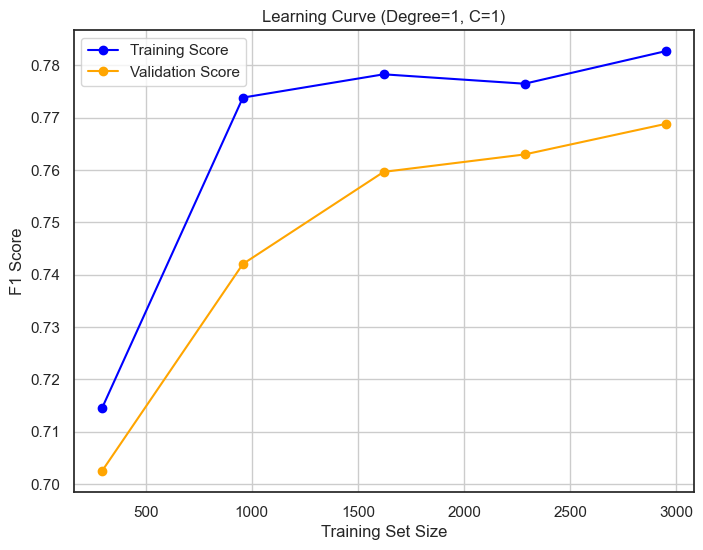



Evaluating SVM with polynomial kernel of degree 1 and C=10:
Accuracy scores: [0.88271186 0.86847458 0.87652646 0.88677966 0.87457627 0.86635007
 0.87864407 0.88338983 0.86770692 0.88338983 0.87457627 0.87449118
 0.86847458 0.87864407 0.88738128 0.87728814 0.87864407 0.87177748
 0.87050847 0.87050847 0.88602442 0.8820339  0.87457627 0.87313433
 0.87661017 0.88338983 0.86024423 0.88135593 0.87728814 0.87313433]
Mean accuracy: 0.8762878366258078
F1 scores for class 1: [0.79907085 0.77283372 0.78333333 0.80826636 0.78106509 0.77172654
 0.79258401 0.80092593 0.76813317 0.8        0.78513357 0.78209658
 0.77283372 0.79064327 0.80378251 0.78928987 0.79258401 0.77738516
 0.77342823 0.77342823 0.80600462 0.79625293 0.78808706 0.77869822
 0.78886311 0.80275229 0.75       0.80225989 0.78977933 0.77711561]
Mean F1 score for class 1: 0.7866119072019299


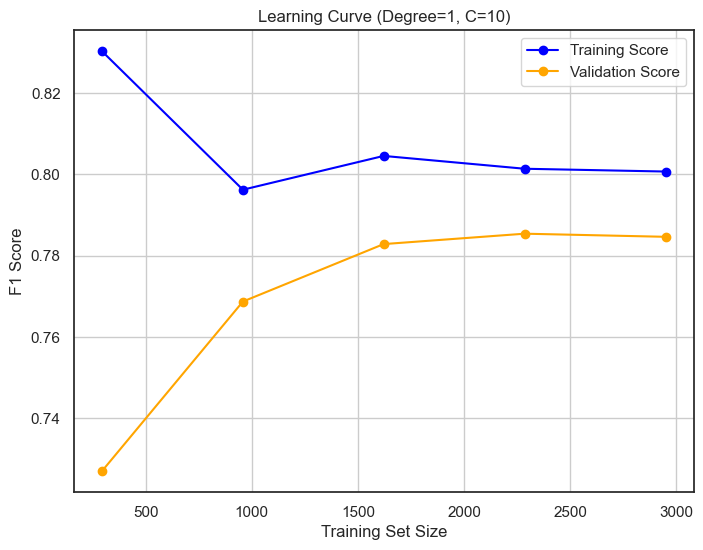



Evaluating SVM with polynomial kernel of degree 1 and C=25:
Accuracy scores: [0.88271186 0.86847458 0.87856174 0.88677966 0.87525424 0.86635007
 0.8779661  0.88271186 0.86431479 0.8820339  0.87254237 0.87516961
 0.86779661 0.8779661  0.88670285 0.8759322  0.87864407 0.87381275
 0.86779661 0.8759322  0.885346   0.88135593 0.8759322  0.87313433
 0.87728814 0.88067797 0.85956581 0.87864407 0.8759322  0.87313433]
Mean accuracy: 0.8759488382432982
F1 scores for class 1: [0.8        0.77336449 0.78715815 0.80870561 0.78352941 0.77172654
 0.79214781 0.80046136 0.76303318 0.79907621 0.78190255 0.78454333
 0.77351916 0.79020979 0.803298   0.78843931 0.79354095 0.78169014
 0.76868327 0.78343195 0.80507497 0.79674797 0.79133409 0.78025852
 0.79026651 0.8        0.7496977  0.79910213 0.78892734 0.77817319]
Mean F1 score for class 1: 0.7869347873385032


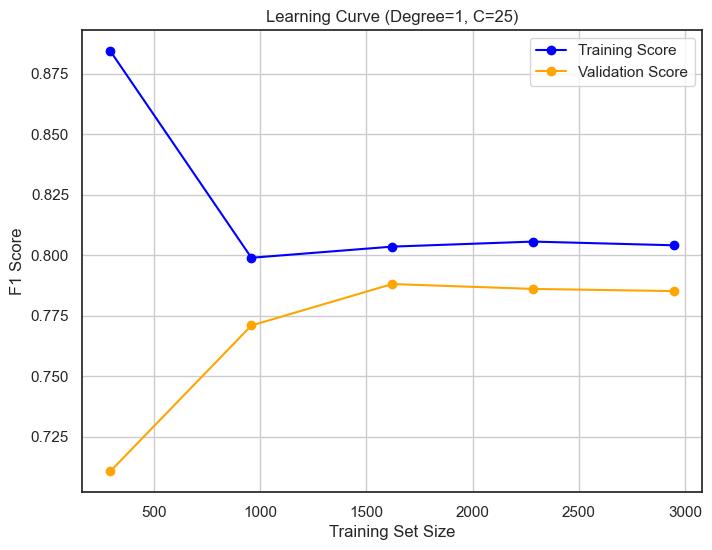



Evaluating SVM with polynomial kernel of degree 1 and C=50:
Accuracy scores: [0.88338983 0.86779661 0.87856174 0.88677966 0.87525424 0.86770692
 0.87728814 0.88271186 0.86635007 0.8840678  0.87322034 0.87449118
 0.86711864 0.87728814 0.88873813 0.87525424 0.87864407 0.87449118
 0.86644068 0.87525424 0.88602442 0.88135593 0.8759322  0.87313433
 0.8779661  0.88271186 0.86160109 0.87864407 0.87457627 0.87177748]
Mean accuracy: 0.8761523813904285
F1 scores for class 1: [0.80092593 0.77246208 0.78715815 0.80914286 0.78352941 0.77456647
 0.79123414 0.80046136 0.76686391 0.80322209 0.78331402 0.78413069
 0.77262181 0.78928987 0.80751174 0.78703704 0.79354095 0.78362573
 0.76686391 0.78301887 0.80733945 0.797219   0.79133409 0.78128655
 0.79166667 0.80318544 0.75421687 0.79865017 0.78662053 0.77633136]
Mean F1 score for class 1: 0.7876123712024244


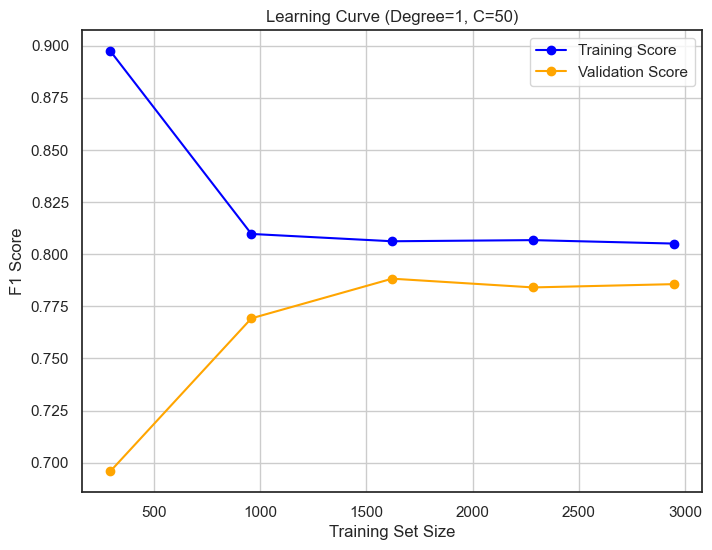



Evaluating SVM with polynomial kernel of degree 1 and C=75:
Accuracy scores: [0.88271186 0.86711864 0.87856174 0.88610169 0.8759322  0.86770692
 0.87661017 0.88271186 0.86499322 0.88271186 0.87186441 0.87516961
 0.86711864 0.87728814 0.88602442 0.87525424 0.87864407 0.8724559
 0.86711864 0.87457627 0.88602442 0.88067797 0.87661017 0.8724559
 0.87932203 0.88271186 0.86160109 0.87728814 0.87525424 0.87177748]
Mean accuracy: 0.8758132603546215
F1 scores for class 1: [0.7995365  0.77102804 0.78715815 0.80821918 0.78495887 0.77456647
 0.78983834 0.80046136 0.7656066  0.80137773 0.78150289 0.78554779
 0.77209302 0.78928987 0.8028169  0.78703704 0.79401611 0.78037383
 0.76832151 0.7826087  0.80733945 0.79582367 0.79271071 0.78088578
 0.79350348 0.80318544 0.75421687 0.79640045 0.78801843 0.77633136]
Mean F1 score for class 1: 0.7871591506837721


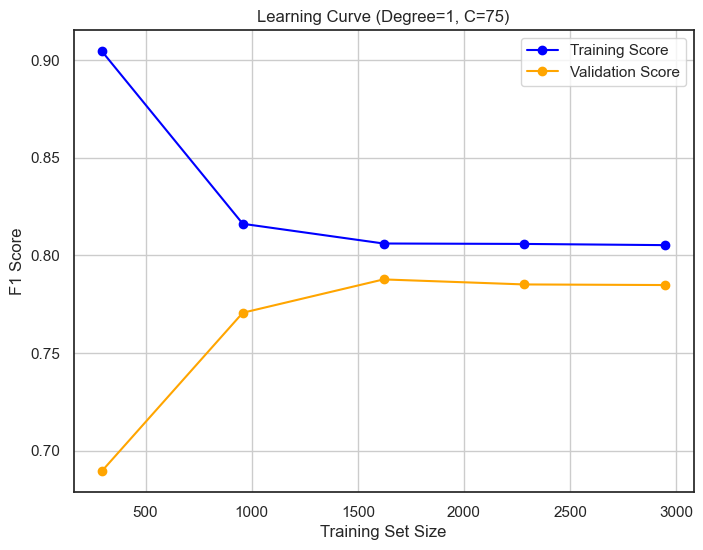



Evaluating SVM with polynomial kernel of degree 1 and C=100:
Accuracy scores: [0.8820339  0.86779661 0.87856174 0.88610169 0.8759322  0.86770692
 0.87728814 0.88271186 0.86567164 0.88271186 0.87186441 0.87516961
 0.86711864 0.87728814 0.88670285 0.87525424 0.87864407 0.8724559
 0.86711864 0.87389831 0.88602442 0.88       0.87661017 0.87177748
 0.87932203 0.8820339  0.86227951 0.8779661  0.87525424 0.8724559 ]
Mean accuracy: 0.8758585040897208
F1 scores for class 1: [0.79861111 0.77246208 0.78715815 0.80821918 0.78495887 0.77456647
 0.79075145 0.80046136 0.76705882 0.80183276 0.78150289 0.78554779
 0.77209302 0.78928987 0.80376028 0.78703704 0.79401611 0.78037383
 0.76832151 0.78117647 0.80733945 0.79442509 0.79223744 0.77946324
 0.79350348 0.80182232 0.755716   0.79775281 0.78801843 0.77725118]
Mean F1 score for class 1: 0.7872242840740711


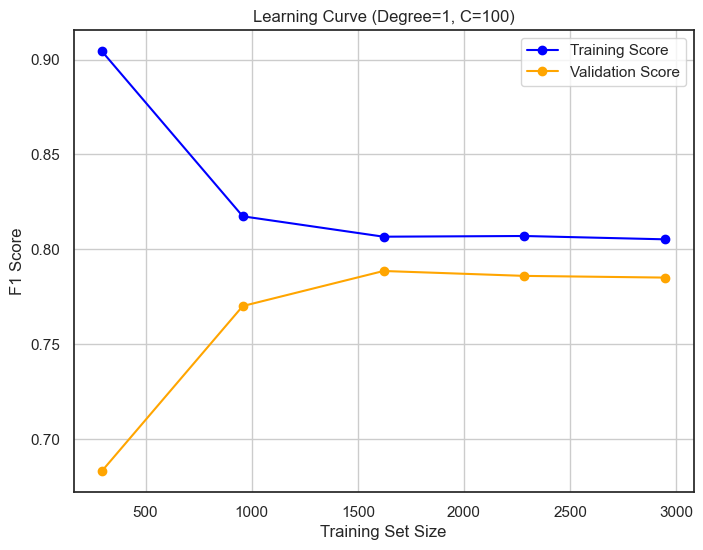



Evaluating SVM with polynomial kernel of degree 2 and C=0.1:
Accuracy scores: [0.73898305 0.74305085 0.75101764 0.75254237 0.73084746 0.74084125
 0.74711864 0.74169492 0.7421981  0.75254237 0.73694915 0.73744912
 0.74237288 0.74101695 0.74151967 0.73966102 0.74847458 0.74016282
 0.73898305 0.74508475 0.75033921 0.74711864 0.74101695 0.74016282
 0.75389831 0.74440678 0.72862958 0.73559322 0.75322034 0.73812754]
Mean accuracy: 0.7428341344126824
F1 scores for class 1: [0.33275563 0.35434412 0.38111298 0.40650407 0.31195841 0.34137931
 0.36672326 0.35966387 0.34707904 0.39669421 0.31205674 0.35175879
 0.3537415  0.33910035 0.33968804 0.33564014 0.37436762 0.34974533
 0.33275563 0.36271186 0.38461538 0.36239316 0.33910035 0.36902801
 0.39398998 0.36209814 0.30313589 0.33219178 0.40716612 0.32986111]
Mean F1 score for class 1: 0.35444536097881074


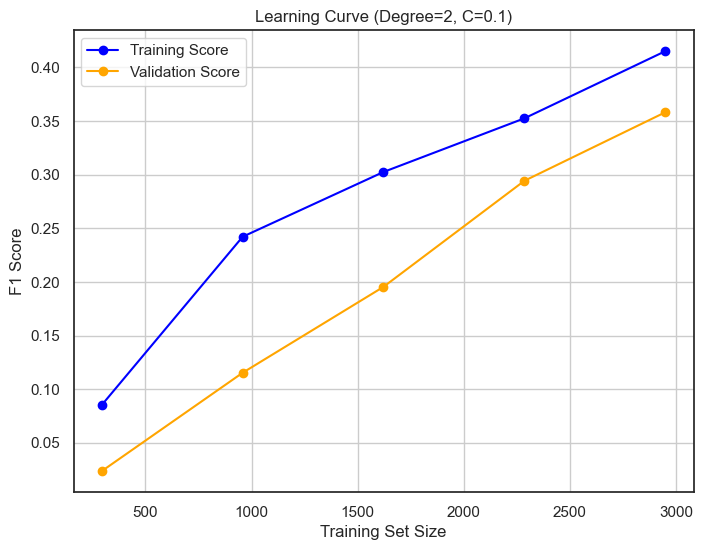



Evaluating SVM with polynomial kernel of degree 2 and C=1:
Accuracy scores: [0.83457627 0.81898305 0.8256445  0.84135593 0.81423729 0.8229308
 0.82440678 0.8359322  0.81614654 0.83728814 0.81355932 0.81139756
 0.82237288 0.83457627 0.8256445  0.82847458 0.81627119 0.81818182
 0.81762712 0.82033898 0.83242877 0.83661017 0.83050847 0.81411126
 0.82779661 0.82169492 0.81953867 0.82169492 0.83389831 0.80800543]
Mean accuracy: 0.8242077746858926
F1 scores for class 1: [0.67292225 0.64257028 0.65687583 0.70076726 0.62568306 0.64682003
 0.65420561 0.68571429 0.64295125 0.68421053 0.62987887 0.62432432
 0.64784946 0.68393782 0.65410498 0.6710013  0.63624161 0.64075067
 0.63500678 0.65177398 0.67371202 0.67651007 0.67105263 0.62972973
 0.66490765 0.65888457 0.63858696 0.64411367 0.68468468 0.61911171]
Mean F1 score for class 1: 0.6549627960245336


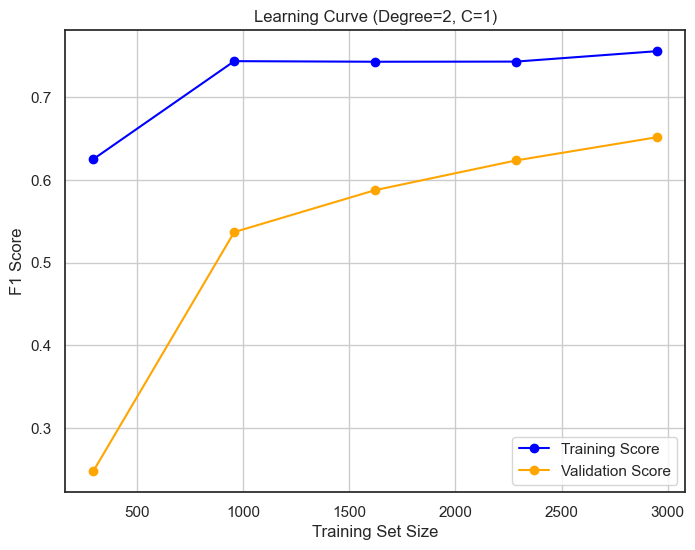



Evaluating SVM with polynomial kernel of degree 2 and C=10:
Accuracy scores: [0.84067797 0.80677966 0.82496608 0.82644068 0.81152542 0.82767978
 0.81830508 0.83322034 0.8202171  0.83457627 0.82237288 0.81953867
 0.83525424 0.81152542 0.83989145 0.83050847 0.80745763 0.83175034
 0.81355932 0.82508475 0.83921303 0.82169492 0.82033898 0.82767978
 0.82440678 0.82915254 0.807327   0.82305085 0.82237288 0.80868385]
Mean accuracy: 0.8235084055837913
F1 scores for class 1: [0.72450176 0.67353952 0.69285714 0.71171171 0.67294118 0.70465116
 0.67788462 0.71981777 0.69150175 0.71294118 0.68957346 0.69212963
 0.7184241  0.67824074 0.72169811 0.71264368 0.66666667 0.70685579
 0.67065868 0.69647059 0.72601156 0.68653159 0.69505178 0.69833729
 0.69778296 0.71034483 0.66109785 0.69473684 0.69745958 0.66348449]
Mean F1 score for class 1: 0.6955516002776727


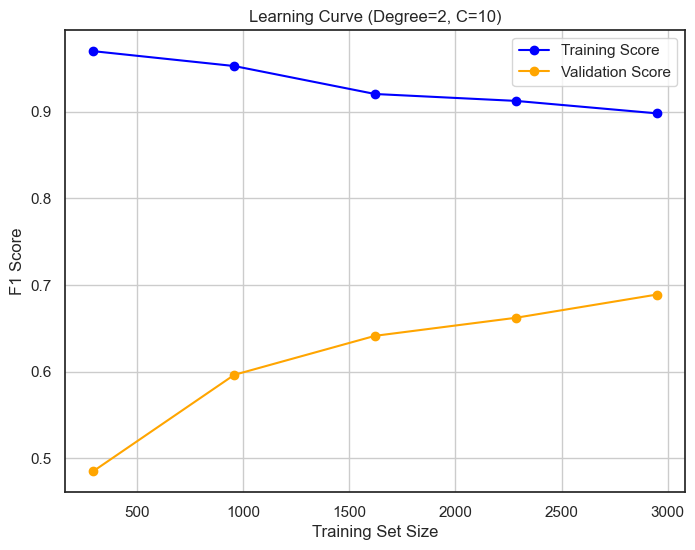



Evaluating SVM with polynomial kernel of degree 2 and C=25:
Accuracy scores: [0.82576271 0.78915254 0.807327   0.80474576 0.79186441 0.80597015
 0.79864407 0.81694915 0.78968792 0.81423729 0.80745763 0.80868385
 0.81152542 0.79932203 0.81411126 0.81220339 0.79661017 0.80868385
 0.7959322  0.80677966 0.81953867 0.79932203 0.80542373 0.81682497
 0.80949153 0.80949153 0.78358209 0.8040678  0.80745763 0.78561737]
Mean accuracy: 0.8048822605002722
F1 scores for class 1: [0.70828604 0.65635359 0.6712963  0.68070953 0.65153235 0.6772009
 0.6566474  0.70198675 0.65011287 0.68505747 0.67356322 0.68456376
 0.68903803 0.67037862 0.68863636 0.69526953 0.66592428 0.67954545
 0.65362486 0.67941507 0.70045045 0.66210046 0.67716535 0.6875
 0.68533035 0.68673356 0.63206459 0.67196368 0.67945824 0.63926941]
Mean F1 score for class 1: 0.6747059487124459


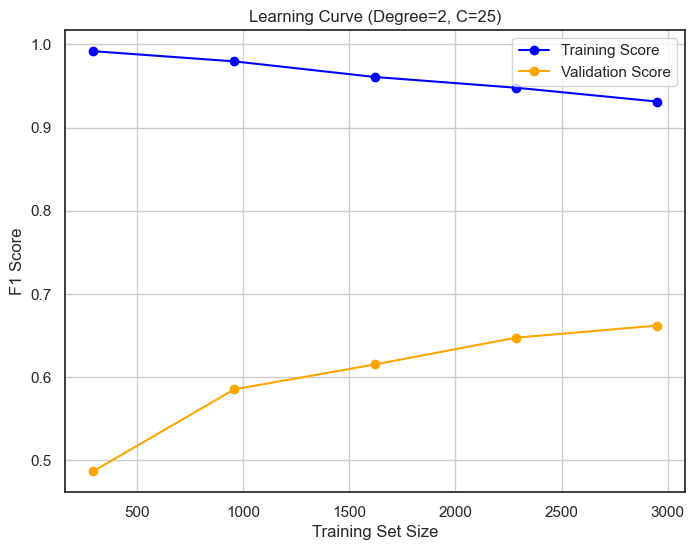



Evaluating SVM with polynomial kernel of degree 2 and C=50:
Accuracy scores: [0.81694915 0.78847458 0.78358209 0.78508475 0.78644068 0.79715061
 0.79118644 0.80474576 0.77544098 0.78779661 0.80271186 0.78697422
 0.79322034 0.77830508 0.79443691 0.79254237 0.78305085 0.79443691
 0.78372881 0.79322034 0.81004071 0.78169492 0.79322034 0.80800543
 0.78915254 0.7979661  0.77272727 0.79254237 0.79118644 0.77272727]
Mean accuracy: 0.7909580909014251
F1 scores for class 1: [0.7        0.65789474 0.64116985 0.65279299 0.64804469 0.66666667
 0.65548098 0.68898488 0.64138678 0.65642151 0.67340067 0.65494505
 0.66811752 0.64648649 0.66370699 0.67096774 0.64835165 0.66519337
 0.63791146 0.66593647 0.69298246 0.64301552 0.66298343 0.68237935
 0.66158868 0.67608696 0.62061155 0.65848214 0.6622807  0.6231721 ]
Mean F1 score for class 1: 0.6595814472630603


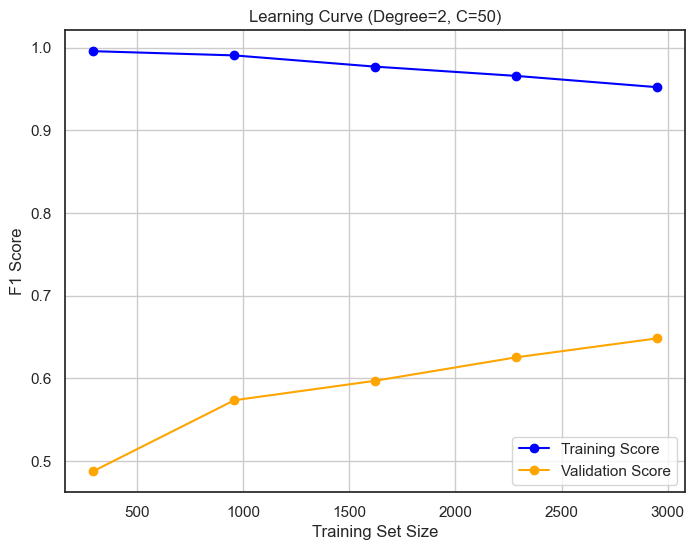



Evaluating SVM with polynomial kernel of degree 2 and C=75:
Accuracy scores: [0.81423729 0.76881356 0.7734057  0.77288136 0.78372881 0.78697422
 0.78644068 0.79728814 0.7734057  0.77966102 0.7959322  0.78290366
 0.78711864 0.76271186 0.78358209 0.78372881 0.77762712 0.77747626
 0.77016949 0.78779661 0.79443691 0.78372881 0.77898305 0.79511533
 0.78237288 0.79525424 0.76390773 0.78847458 0.78101695 0.76187246]
Mean accuracy: 0.7823682051989667
F1 scores for class 1: [0.6989011  0.6289445  0.62888889 0.63783784 0.6521265  0.65418502
 0.65270121 0.67250821 0.64392324 0.64635473 0.66959385 0.64989059
 0.66309013 0.62686567 0.65438787 0.65438787 0.64113786 0.64502165
 0.61867267 0.66015201 0.6702938  0.64594895 0.64332604 0.66666667
 0.65446717 0.67526882 0.61073826 0.65486726 0.65306122 0.60249151]
Mean F1 score for class 1: 0.6492233694105213


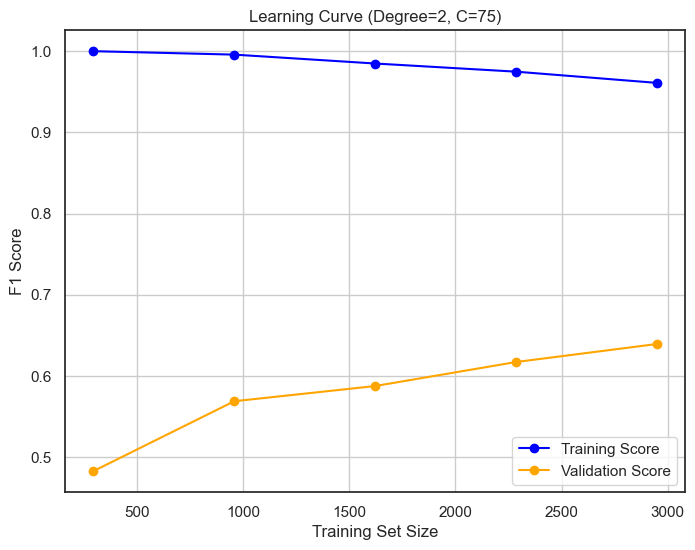



Evaluating SVM with polynomial kernel of degree 2 and C=100:
Accuracy scores: [0.80338983 0.76813559 0.76729986 0.77491525 0.77355932 0.77815468
 0.77762712 0.78576271 0.76255088 0.77355932 0.78983051 0.7761194
 0.77491525 0.75661017 0.77137042 0.77355932 0.77016949 0.77272727
 0.76677966 0.77627119 0.79308005 0.77694915 0.77423729 0.78697422
 0.77355932 0.78305085 0.74898236 0.78101695 0.76745763 0.76322931]
Mean accuracy: 0.7747281466320171
F1 scores for class 1: [0.68546638 0.63146552 0.62015504 0.63991323 0.64008621 0.64105379
 0.64035088 0.65652174 0.63080169 0.63774403 0.66157205 0.64439655
 0.64301075 0.61686233 0.63879957 0.63930886 0.63351351 0.64171123
 0.61607143 0.64668094 0.67518637 0.64122137 0.63764962 0.65570175
 0.64239829 0.65884861 0.58888889 0.64853101 0.6339381  0.60564972]
Mean F1 score for class 1: 0.6397833152739232


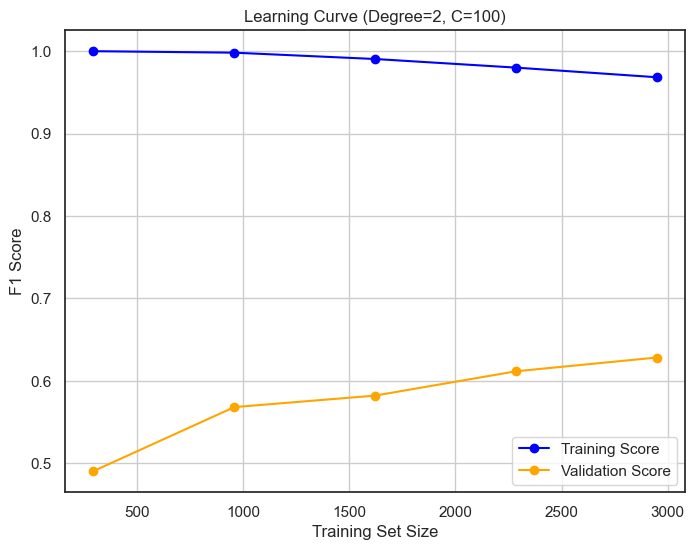



    degree      C  mean_accuracy   mean_f1
0        1    0.1       0.860081  0.744404
1        1    1.0       0.868986  0.767097
2        1   10.0       0.876288  0.786612
3        1   25.0       0.875949  0.786935
4        1   50.0       0.876152  0.787612
5        1   75.0       0.875813  0.787159
6        1  100.0       0.875859  0.787224
7        2    0.1       0.742834  0.354445
8        2    1.0       0.824208  0.654963
9        2   10.0       0.823508  0.695552
10       2   25.0       0.804882  0.674706
11       2   50.0       0.790958  0.659581
12       2   75.0       0.782368  0.649223
13       2  100.0       0.774728  0.639783


In [36]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

# Define the degrees and C values to evaluate
degrees = [1, 2] #[1,2,3,4,5]
C_values = [0.1, 1, 10, 25, 50, 75, 100]

# Initialize a list to store the results
svm_results = []

# Initialize a list to store the learning curve results
learning_curves = []

# Iterate over the degrees and C values
for degree in degrees:
    for C in C_values:
        # Create the SVM model with the current degree and C value
        svm_model = SVC(kernel='poly', degree=degree, C=C)
        
        # Evaluate the model
        print(f"Evaluating SVM with polynomial kernel of degree {degree} and C={C}:")
        scores_accuracy, scores_f1 = evaluate_model(svm_model, X_scaled, y_dummies)
        
        # Print the accuracy and F1 scores for the current setting
        print(f"Accuracy scores: {scores_accuracy}")
        print(f"Mean accuracy: {scores_accuracy.mean()}")
        print(f"F1 scores for class 1: {scores_f1}")
        print(f"Mean F1 score for class 1: {scores_f1.mean()}")
        
        # Compute learning curves
        train_sizes, train_scores, val_scores = learning_curve(
            svm_model, X_scaled, y_dummies, cv=3, scoring='f1', n_jobs=-1
        )
        
        # Append the learning curve results
        learning_curves.append({
            'degree': degree,
            'C': C,
            'train_sizes': train_sizes,
            'train_scores': train_scores.mean(axis=1),
            'val_scores': val_scores.mean(axis=1)
        })
        
        # Plot the learning curve
        plt.figure(figsize=(8, 6))
        plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training Score', color='blue')
        plt.plot(train_sizes, val_scores.mean(axis=1), 'o-', label='Validation Score', color='orange')
        plt.title(f'Learning Curve (Degree={degree}, C={C})')
        plt.xlabel('Training Set Size')
        plt.ylabel('F1 Score')
        plt.legend(loc='best')
        plt.grid(True)
        plt.show()
        
        print("\n")
        
        # Append the results to the list
        svm_results.append({
            'degree': degree,
            'C': C,
            'mean_accuracy': scores_accuracy.mean(),
            'mean_f1': scores_f1.mean()
        })

# Convert the results to a DataFrame
svm_results_df = pd.DataFrame(svm_results)

# Display the DataFrame
print(svm_results_df)



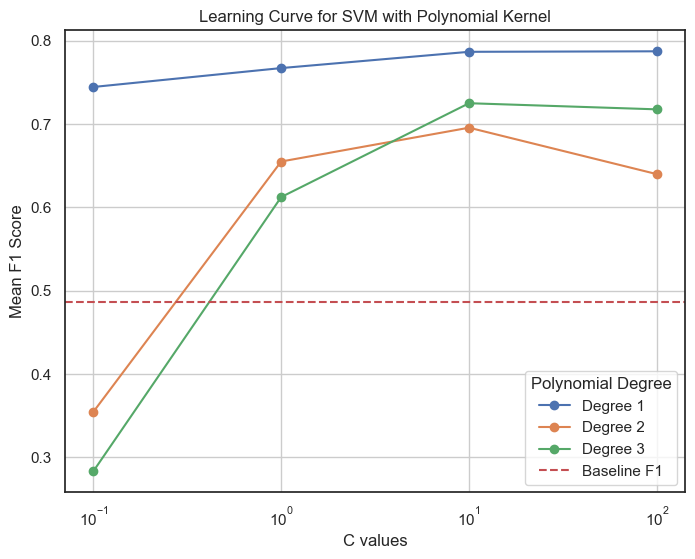

In [22]:
# Plot the F1 score for each degree of the polynomial kernel
plt.figure(figsize=(8, 6))

# Loop through each unique degree
for degree in degrees:
    # Filter results for the current degree
    degree_results = svm_results_df[svm_results_df['degree'] == degree]
    
    # Plot F1 scores for the current degree
    plt.plot(degree_results['C'], degree_results['mean_f1'], marker='o', label=f'Degree {degree}')

# Add baseline F1 score as horizontal line
baseline_f1 = 0.48622742456172907
plt.axhline(y=baseline_f1, color='r', linestyle='--', label='Baseline F1')

# Customize the plot
plt.xlabel('C values')
plt.ylabel('Mean F1 Score')
plt.title('Learning Curve for SVM with Polynomial Kernel')
plt.xscale('log')  # Use logarithmic scale for C values
plt.legend(title='Polynomial Degree')
plt.grid(True)
plt.show()

## Random forrest evaluation:
The second ML algorithm we evaluate is the Random Forest classifier. Random Forests are ensemble methods that build multiple decision trees with different feature selection and sample selection during training and combine their outputs for prediction, which tends to perform better then having a single decision tree. For this algorithm no scaling is necessary because it only compares the feature values within a feature and not between features.  

For this algorithm, we tune these two hyperparameter:

* Number of Trees (n_estimators): Determines the number of decision trees in the forest. A larger number of trees generally leads to more stable and robust predictions but increases training time.
* Maximum Tree Depth (max_depth): Controls the depth of each decision tree. Shallower trees limit model complexity, reducing overfitting but potentially underfitting the data. Deeper trees can capture more details in the data but may overfit, especially when combined with small datasets.

In [23]:
from sklearn.ensemble import RandomForestClassifier

Evaluating Random Forest with 10 trees and depth 5:
Accuracy scores: [0.86528029 0.83092224 0.85895118 0.85126582 0.85669078 0.8517179
 0.85714286 0.85352622 0.84855335 0.84312839 0.84674503 0.8562387
 0.8539783  0.85081374 0.85578662 0.84764919 0.85669078 0.84177215
 0.84267631 0.86528029]
Mean accuracy: 0.8517405063291138
F1 scores for class 1: [0.75412541 0.69344262 0.75663027 0.74074074 0.75059009 0.73548387
 0.7523511  0.73399015 0.72518458 0.72350598 0.72281276 0.7456
 0.74180655 0.73257699 0.74941084 0.72888174 0.75445391 0.71636953
 0.73189522 0.75928918]
Mean F1 score for class 1: 0.7374570756341369


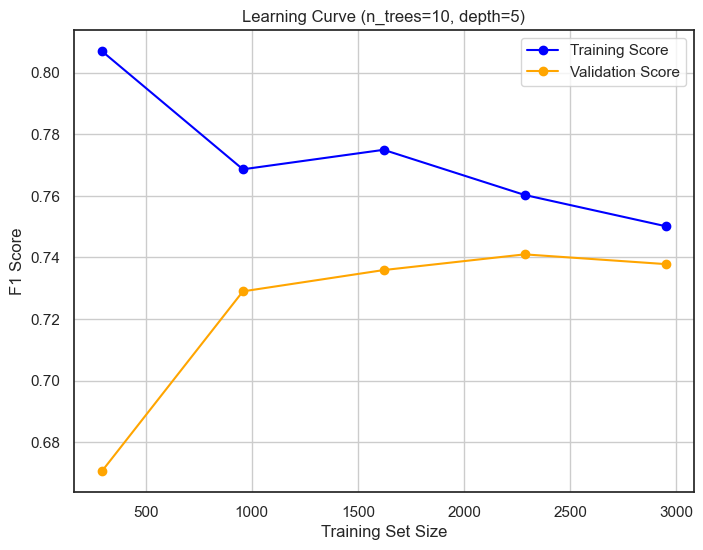



Evaluating Random Forest with 10 trees and depth 10:
Accuracy scores: [0.86844485 0.8517179  0.86347197 0.86934901 0.87025316 0.86121157
 0.86889693 0.85307414 0.8562387  0.86618445 0.85352622 0.86528029
 0.86075949 0.86030741 0.86482821 0.8584991  0.86437613 0.86121157
 0.86030741 0.86392405]
Mean accuracy: 0.8620931283905966
F1 scores for class 1: [0.77666922 0.73968254 0.76107595 0.77820414 0.77630553 0.75654243
 0.77308294 0.75019216 0.74478331 0.77160494 0.75038521 0.76572327
 0.75632911 0.75534442 0.7665886  0.75717611 0.7706422  0.74897792
 0.76358072 0.76720804]
Mean F1 score for class 1: 0.7615049385827597


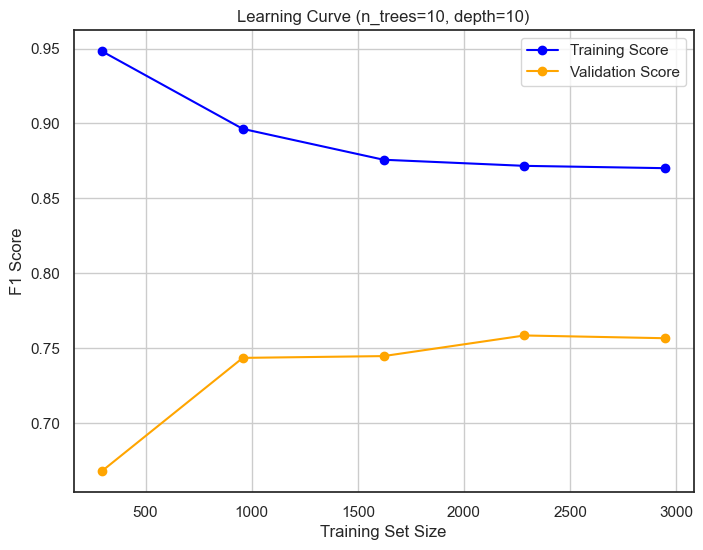



Evaluating Random Forest with 10 trees and depth 15:
Accuracy scores: [0.86437613 0.84719711 0.85985533 0.84584087 0.86844485 0.85714286
 0.85895118 0.85759494 0.86075949 0.85714286 0.85307414 0.86030741
 0.8539783  0.86708861 0.85804702 0.85759494 0.8539783  0.85036166
 0.85578662 0.85488246]
Mean accuracy: 0.8571202531645572
F1 scores for class 1: [0.77272727 0.73343849 0.7566719  0.74225246 0.774942   0.75951294
 0.76255708 0.76118271 0.76271186 0.75427683 0.75171887 0.75802662
 0.75172944 0.77591463 0.75920245 0.75371384 0.75324675 0.73413655
 0.75704494 0.75402299]
Mean F1 score for class 1: 0.7564515307283527


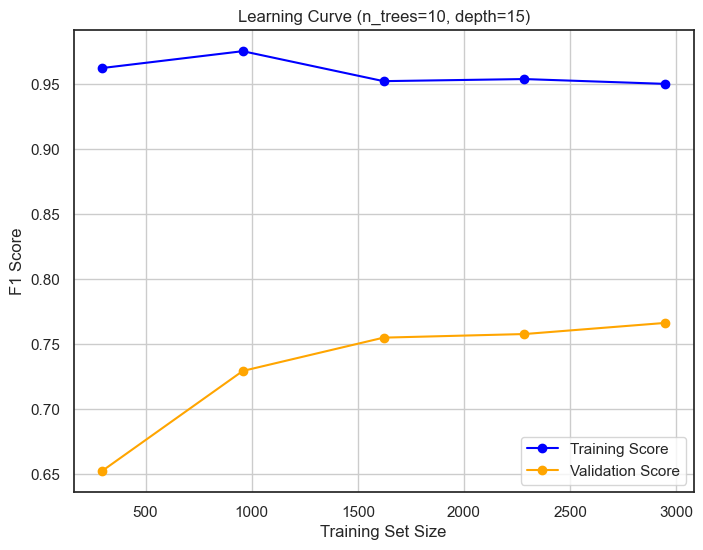



Evaluating Random Forest with 10 trees and depth 20:
Accuracy scores: [0.86482821 0.85126582 0.8584991  0.85940325 0.86437613 0.85578662
 0.86030741 0.85081374 0.85081374 0.86075949 0.86121157 0.85759494
 0.8584991  0.86075949 0.8562387  0.85081374 0.86166365 0.85352622
 0.85669078 0.85895118]
Mean accuracy: 0.8576401446654611
F1 scores for class 1: [0.77192982 0.74033149 0.75059761 0.75722092 0.765625   0.7505864
 0.7587822  0.74339036 0.73933649 0.75671406 0.76071707 0.75524476
 0.75412412 0.75899844 0.74921136 0.74458204 0.76605505 0.73913043
 0.74660272 0.75888717]
Mean F1 score for class 1: 0.7534033750209655


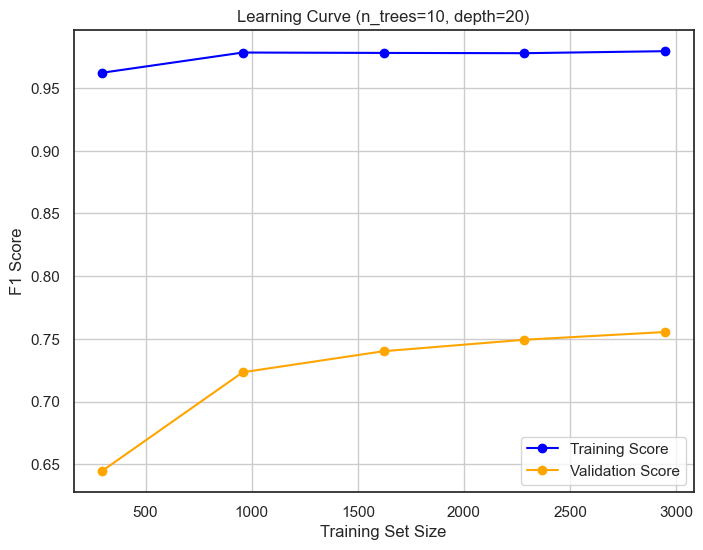



Evaluating Random Forest with 10 trees and depth 40:
Accuracy scores: [0.86075949 0.85262206 0.85759494 0.86256781 0.86889693 0.8584991
 0.86301989 0.84403255 0.85714286 0.85985533 0.86211573 0.86211573
 0.85759494 0.86121157 0.86301989 0.8517179  0.86437613 0.85352622
 0.85533454 0.86663653]
Mean accuracy: 0.859132007233273
F1 scores for class 1: [0.7652439  0.7392     0.74900398 0.76360809 0.77165354 0.75138999
 0.76272514 0.72727273 0.7496038  0.75435816 0.76078431 0.76227592
 0.74980143 0.75996873 0.7593328  0.74213836 0.76415094 0.73486088
 0.74683544 0.76898982]
Mean F1 score for class 1: 0.7541598990970484


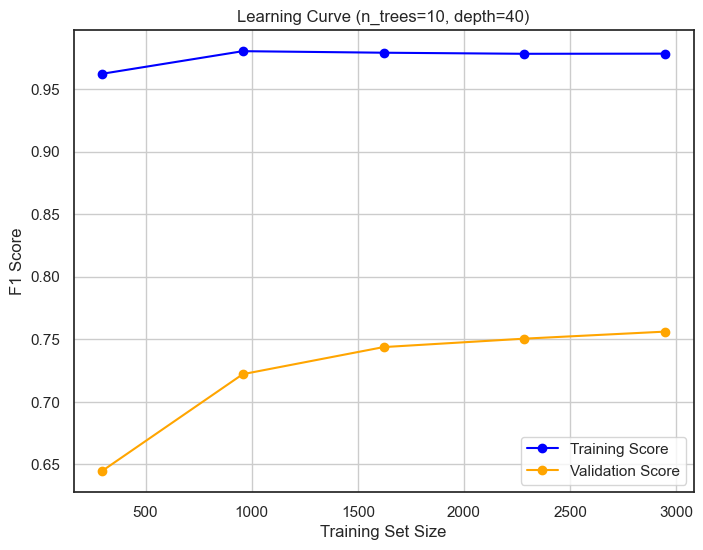



Evaluating Random Forest with 50 trees and depth 5:
Accuracy scores: [0.87522604 0.829566   0.85578662 0.85443038 0.85126582 0.86166365
 0.85578662 0.86030741 0.85352622 0.84584087 0.85488246 0.85533454
 0.85533454 0.84538879 0.8539783  0.85216998 0.86347197 0.83453888
 0.84403255 0.85804702]
Mean accuracy: 0.8530289330922243
F1 scores for class 1: [0.77669903 0.69864109 0.74862096 0.74322169 0.73142857 0.75441413
 0.74662431 0.75456712 0.73572594 0.72828685 0.74175382 0.74068071
 0.74276527 0.72058824 0.74303898 0.740682   0.76220472 0.70340357
 0.72856019 0.74388254]
Mean F1 score for class 1: 0.7392894862107238


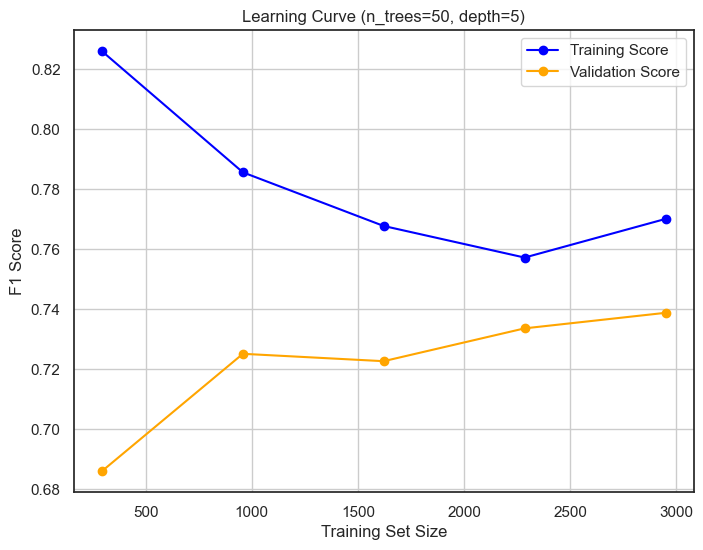



Evaluating Random Forest with 50 trees and depth 10:
Accuracy scores: [0.8761302  0.85578662 0.87522604 0.87115732 0.87522604 0.86708861
 0.87432188 0.86437613 0.87025316 0.86889693 0.86121157 0.86980108
 0.86708861 0.86799277 0.87432188 0.86708861 0.87477396 0.86075949
 0.86392405 0.87748644]
Mean accuracy: 0.8691455696202531
F1 scores for class 1: [0.78660436 0.74336283 0.78369906 0.77855478 0.78403756 0.76629571
 0.78178964 0.76599064 0.77058353 0.77379095 0.75921569 0.775
 0.76923077 0.76898734 0.78315133 0.76555024 0.78675905 0.74795417
 0.76502732 0.78678206]
Mean F1 score for class 1: 0.77211835130581


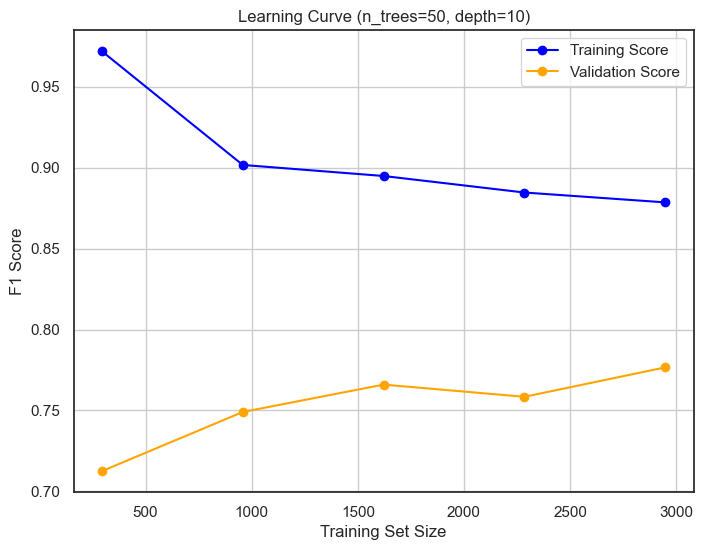



Evaluating Random Forest with 50 trees and depth 15:
Accuracy scores: [0.87884268 0.85714286 0.87341772 0.86437613 0.8738698  0.86754069
 0.87296564 0.87432188 0.87296564 0.87522604 0.86754069 0.8716094
 0.87251356 0.86889693 0.87477396 0.86618445 0.87432188 0.85759494
 0.86166365 0.87251356]
Mean accuracy: 0.8699141048824593
F1 scores for class 1: [0.79384615 0.75078864 0.78193146 0.76851852 0.78321678 0.77198444
 0.78367975 0.78713629 0.77995301 0.78963415 0.77409406 0.78153846
 0.77899687 0.77484472 0.78708686 0.7672956  0.78582435 0.75019826
 0.76533742 0.78037383]
Mean F1 score for class 1: 0.7768139813894748


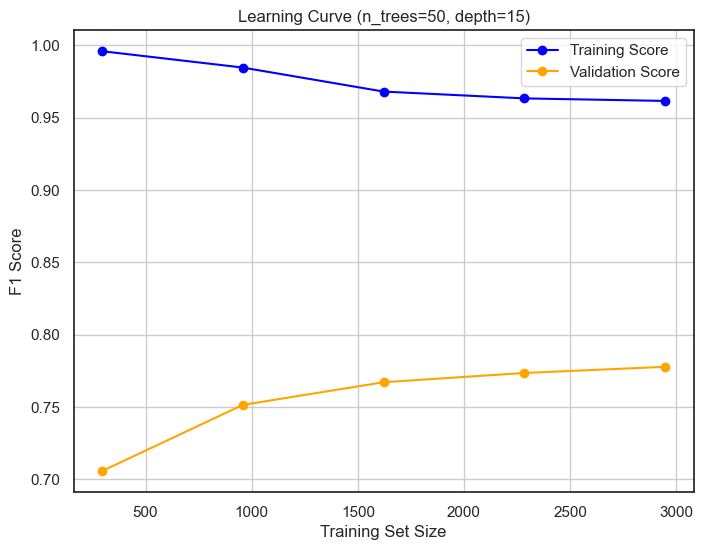



Evaluating Random Forest with 50 trees and depth 20:
Accuracy scores: [0.87567812 0.85578662 0.87341772 0.86392405 0.87070524 0.86347197
 0.87658228 0.87206148 0.87115732 0.87341772 0.86934901 0.86889693
 0.86844485 0.87251356 0.8761302  0.86075949 0.87115732 0.86437613
 0.86256781 0.87025316]
Mean accuracy: 0.8690325497287523
F1 scores for class 1: [0.78927203 0.74662431 0.78159126 0.76899463 0.77932099 0.76589147
 0.78951426 0.78180416 0.77751756 0.78361669 0.77544678 0.77726575
 0.77354086 0.7810559  0.78825348 0.76012461 0.78227655 0.76265823
 0.76651306 0.77872012]
Mean F1 score for class 1: 0.7755001345947317


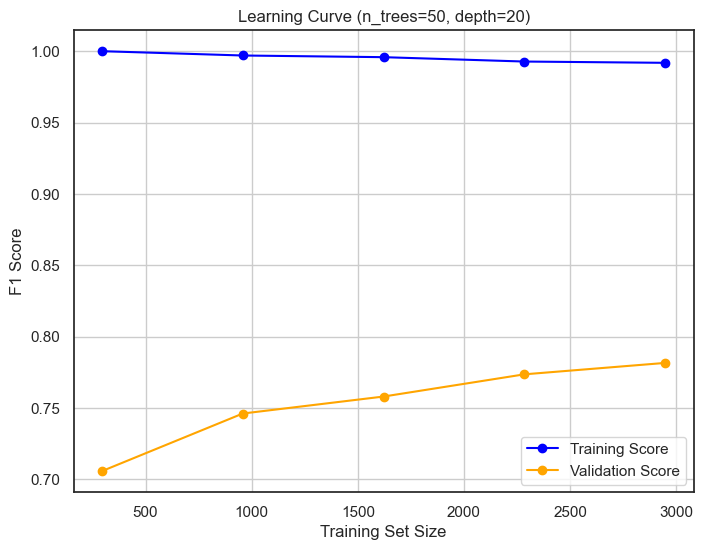



Evaluating Random Forest with 50 trees and depth 40:
Accuracy scores: [0.87567812 0.85443038 0.87296564 0.86347197 0.87251356 0.86482821
 0.8761302  0.86844485 0.86754069 0.87341772 0.86934901 0.86980108
 0.86980108 0.87070524 0.87251356 0.86392405 0.87296564 0.86211573
 0.86573237 0.87070524]
Mean accuracy: 0.8688517179023508
F1 scores for class 1: [0.79087452 0.7424     0.77960784 0.76697531 0.78307692 0.76475216
 0.78955453 0.7724785  0.77019608 0.78428351 0.77579519 0.77639752
 0.77464789 0.77760498 0.7796875  0.76539361 0.78301158 0.7565842
 0.77065637 0.77725857]
Mean F1 score for class 1: 0.7740618390980776


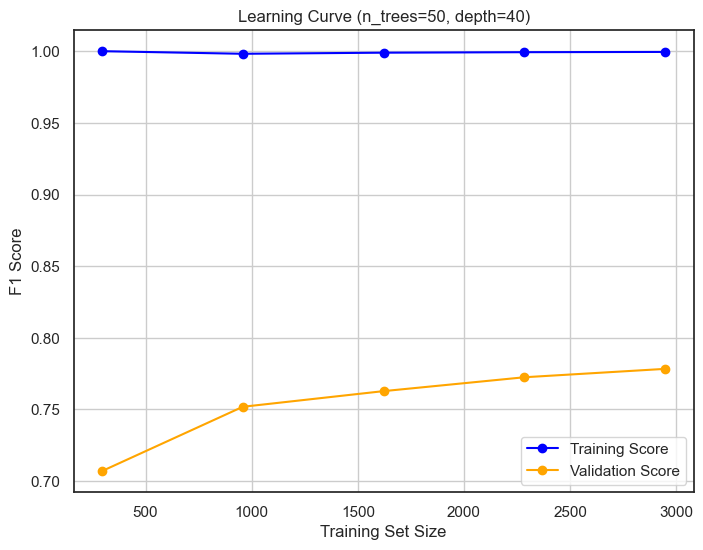



Evaluating Random Forest with 100 trees and depth 5:
Accuracy scores: [0.87070524 0.83047016 0.85307414 0.85262206 0.8562387  0.85804702
 0.85895118 0.8584991  0.85759494 0.85126582 0.85578662 0.85759494
 0.85940325 0.84900542 0.85443038 0.85443038 0.86437613 0.84312839
 0.84448463 0.85804702]
Mean accuracy: 0.8544077757685351
F1 scores for class 1: [0.76823339 0.69684721 0.74062251 0.73624595 0.74104235 0.74718196
 0.74959872 0.74859438 0.74411048 0.73992095 0.74211803 0.74411048
 0.7510008  0.72801303 0.74605678 0.74403816 0.76415094 0.71719641
 0.7299843  0.74262295]
Mean F1 score for class 1: 0.7410844887347448


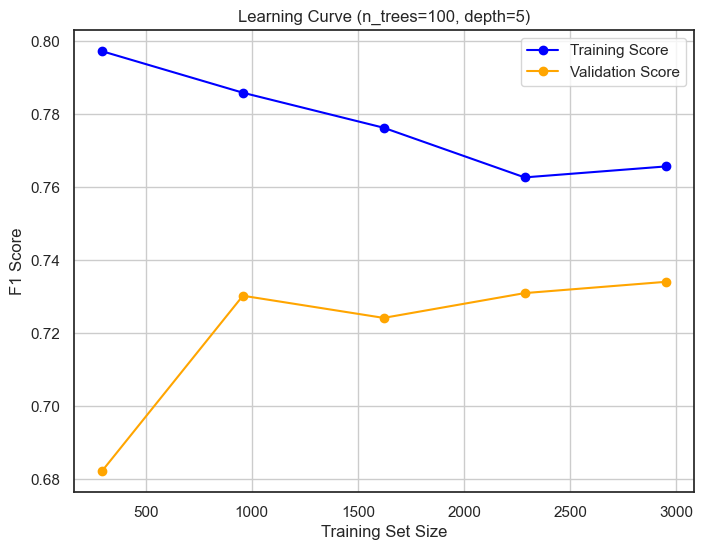



Evaluating Random Forest with 100 trees and depth 10:
Accuracy scores: [0.87522604 0.85488246 0.87748644 0.86618445 0.87793852 0.86889693
 0.87658228 0.86618445 0.86889693 0.87025316 0.86482821 0.86980108
 0.87251356 0.86934901 0.87251356 0.86663653 0.8716094  0.86482821
 0.86301989 0.87477396]
Mean accuracy: 0.8696202531645569
F1 scores for class 1: [0.78538103 0.74340528 0.78678206 0.76982893 0.7890625  0.76984127
 0.78486998 0.76911076 0.768      0.77454831 0.76475216 0.77322835
 0.77725118 0.77297722 0.7807154  0.76568705 0.7808642  0.75906527
 0.76456876 0.78171789]
Mean F1 score for class 1: 0.7730828798123868


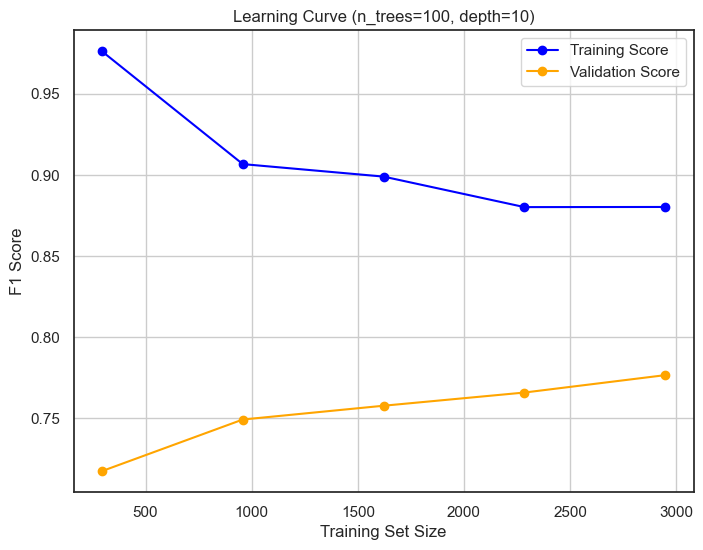



Evaluating Random Forest with 100 trees and depth 15:
Accuracy scores: [0.87793852 0.85714286 0.87296564 0.86889693 0.87793852 0.86799277
 0.87206148 0.87477396 0.87251356 0.87251356 0.86844485 0.87251356
 0.8738698  0.87251356 0.87522604 0.86754069 0.87522604 0.85985533
 0.86663653 0.87658228]
Mean accuracy: 0.8711573236889694
F1 scores for class 1: [0.79198767 0.74920635 0.77995301 0.77692308 0.78939158 0.77293935
 0.78180416 0.78675905 0.77795276 0.78374233 0.77389277 0.78037383
 0.78254092 0.7807154  0.78703704 0.76983504 0.78801843 0.75279107
 0.77290223 0.78754864]
Mean F1 score for class 1: 0.7783157349813076


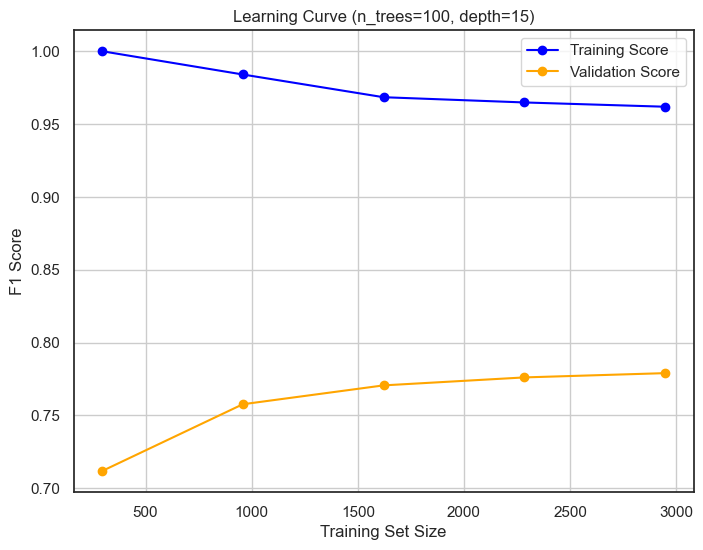



Evaluating Random Forest with 100 trees and depth 20:
Accuracy scores: [0.87522604 0.85714286 0.87567812 0.86844485 0.8738698  0.86708861
 0.87793852 0.87206148 0.87251356 0.8716094  0.86934901 0.87115732
 0.87522604 0.87522604 0.87522604 0.86618445 0.87432188 0.86075949
 0.86392405 0.87206148]
Mean accuracy: 0.8707504520795659
F1 scores for class 1: [0.78899083 0.7496038  0.78397486 0.77735272 0.78388846 0.77067083
 0.79134467 0.78146718 0.77899687 0.78120185 0.77579519 0.7792409
 0.78769231 0.78538103 0.78703704 0.76875    0.78713629 0.75786164
 0.76899463 0.78112916]
Mean F1 score for class 1: 0.7783255115200831


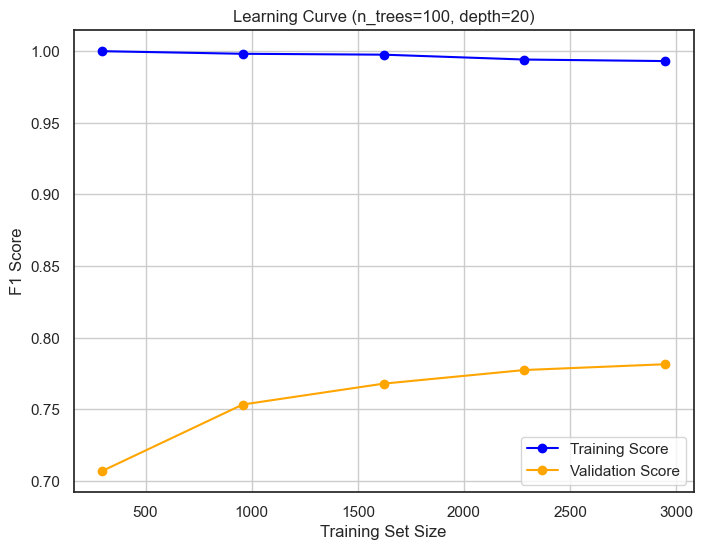



Evaluating Random Forest with 100 trees and depth 40:
Accuracy scores: [0.87703436 0.86166365 0.87748644 0.86708861 0.87567812 0.86844485
 0.8738698  0.87206148 0.86708861 0.87206148 0.86754069 0.86889693
 0.87432188 0.8738698  0.87567812 0.86754069 0.87567812 0.86166365
 0.86754069 0.87522604]
Mean accuracy: 0.8710216998191681
F1 scores for class 1: [0.79076923 0.75675676 0.78610892 0.77453988 0.78731632 0.77318784
 0.78355314 0.78044996 0.7703125  0.78247502 0.77478862 0.77623457
 0.78382582 0.78287938 0.78731632 0.77162899 0.78894858 0.75791139
 0.77582249 0.78504673]
Mean F1 score for class 1: 0.778493623027009


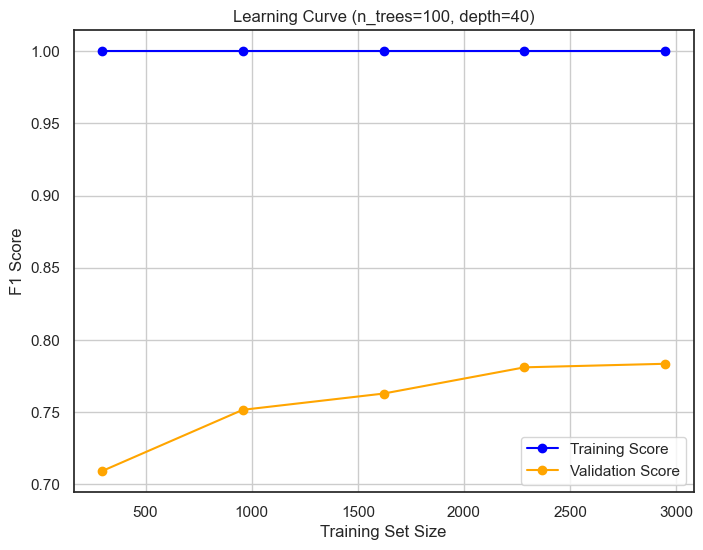



Evaluating Random Forest with 200 trees and depth 5:
Accuracy scores: [0.87115732 0.83047016 0.8517179  0.85714286 0.85714286 0.85985533
 0.85895118 0.85759494 0.85895118 0.8494575  0.85669078 0.85714286
 0.85895118 0.84674503 0.85443038 0.85262206 0.86618445 0.84403255
 0.84629295 0.85759494]
Mean accuracy: 0.8546564195298373
F1 scores for class 1: [0.76960388 0.69733656 0.73968254 0.74598071 0.74308943 0.75
 0.74959872 0.74779824 0.74592834 0.73592387 0.74538153 0.74516129
 0.75277338 0.72371638 0.7424     0.73794212 0.76692913 0.71882641
 0.73354232 0.74285714]
Mean F1 score for class 1: 0.7417235990609147


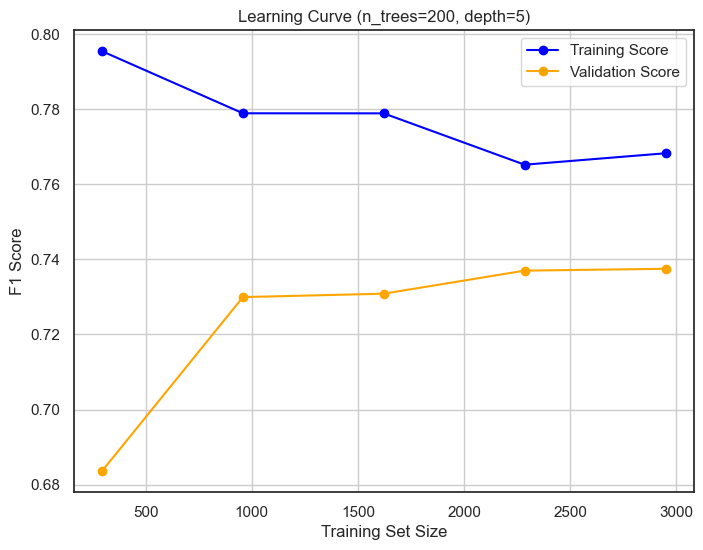



Evaluating Random Forest with 200 trees and depth 10:
Accuracy scores: [0.87793852 0.8562387  0.87522604 0.86844485 0.87477396 0.86663653
 0.87296564 0.86889693 0.86663653 0.87115732 0.86708861 0.87025316
 0.87432188 0.86889693 0.87567812 0.86663653 0.87296564 0.86573237
 0.86121157 0.87522604]
Mean accuracy: 0.8698462929475588
F1 scores for class 1: [0.78873239 0.74761905 0.78199052 0.7742436  0.78206137 0.76679842
 0.7785658  0.77379095 0.76418865 0.77647059 0.76703645 0.7752545
 0.7807571  0.77237049 0.78565861 0.76605868 0.78267595 0.76144578
 0.76034348 0.78301887]
Mean F1 score for class 1: 0.7734540626685921


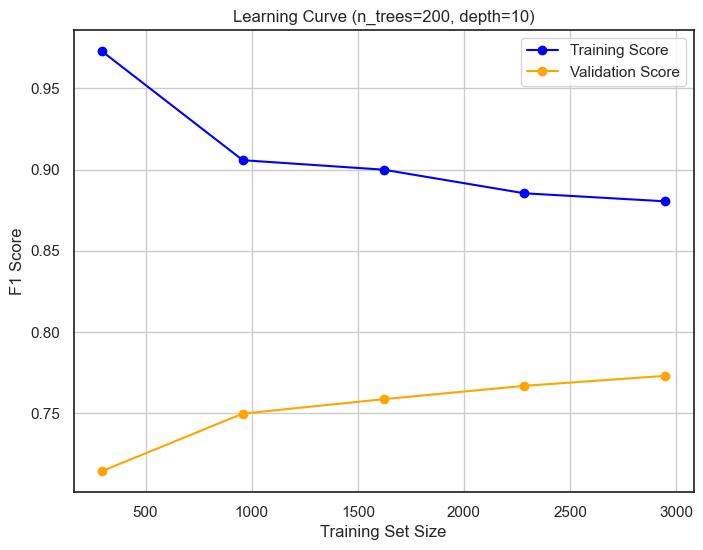



Evaluating Random Forest with 200 trees and depth 15:
Accuracy scores: [0.87703436 0.85669078 0.87703436 0.87115732 0.87658228 0.86980108
 0.87341772 0.8738698  0.87251356 0.87341772 0.86934901 0.87341772
 0.87522604 0.87115732 0.87522604 0.86754069 0.87522604 0.85895118
 0.86482821 0.87522604]
Mean accuracy: 0.8713833634719711
F1 scores for class 1: [0.79109063 0.74901029 0.78783151 0.77992278 0.78721746 0.77604977
 0.78125    0.78388846 0.77830189 0.78361669 0.77544678 0.78395062
 0.78604651 0.77889837 0.78538103 0.76983504 0.78866769 0.75277338
 0.769468   0.78604651]
Mean F1 score for class 1: 0.7787346697196404


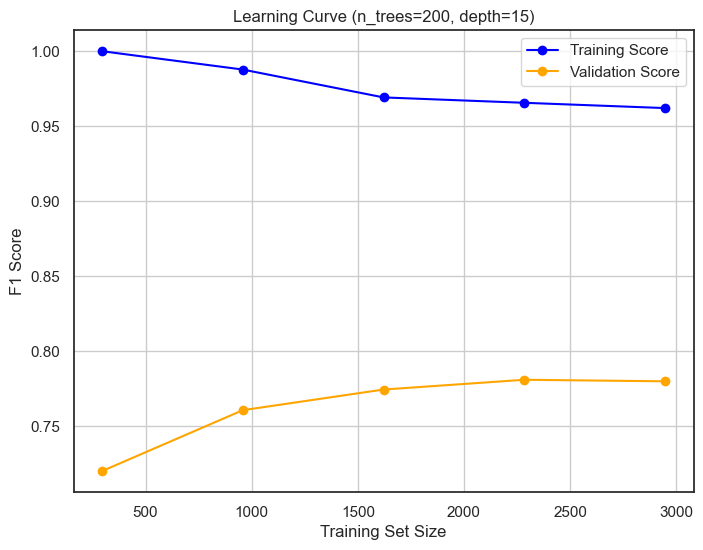



Evaluating Random Forest with 200 trees and depth 20:
Accuracy scores: [0.87703436 0.86075949 0.8761302  0.86799277 0.87703436 0.87115732
 0.87432188 0.87432188 0.86980108 0.87567812 0.86934901 0.87341772
 0.87296564 0.8738698  0.87432188 0.86844485 0.87477396 0.85940325
 0.86482821 0.87341772]
Mean accuracy: 0.8714511754068717
F1 scores for class 1: [0.79141104 0.75709779 0.78660436 0.77572965 0.78979907 0.77992278
 0.78449612 0.78582435 0.77358491 0.78862414 0.77648879 0.78428351
 0.78301158 0.78422274 0.78516229 0.77176471 0.7896735  0.75684128
 0.769468   0.78428351]
Mean F1 score for class 1: 0.7799147058683913


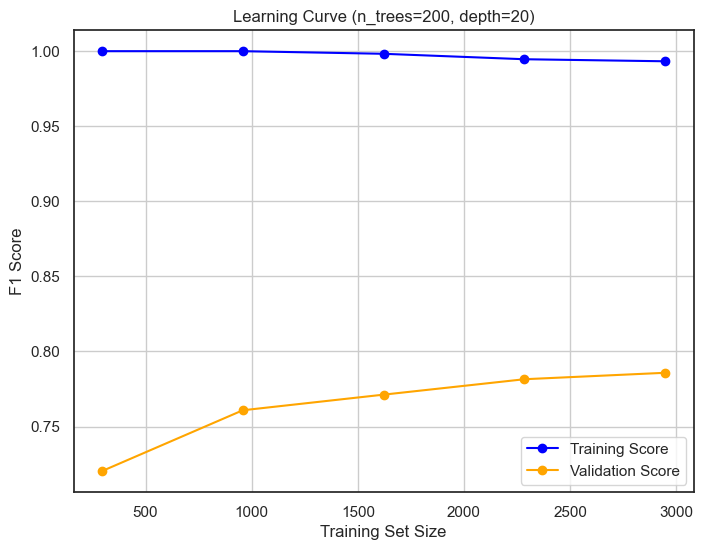



Evaluating Random Forest with 200 trees and depth 40:
Accuracy scores: [0.87748644 0.8584991  0.8761302  0.8716094  0.8783906  0.86934901
 0.87884268 0.87251356 0.86980108 0.87567812 0.86663653 0.87567812
 0.87477396 0.87206148 0.87251356 0.86934901 0.87658228 0.85759494
 0.86482821 0.8761302 ]
Mean accuracy: 0.8717224231464739
F1 scores for class 1: [0.79265493 0.75217736 0.78627145 0.78187404 0.79291763 0.77544678
 0.79192547 0.78139535 0.775      0.78764479 0.77290223 0.78764479
 0.78543765 0.78079009 0.78274268 0.77404222 0.79144385 0.75177305
 0.77017679 0.7879257 ]
Mean F1 score for class 1: 0.7801093411838481


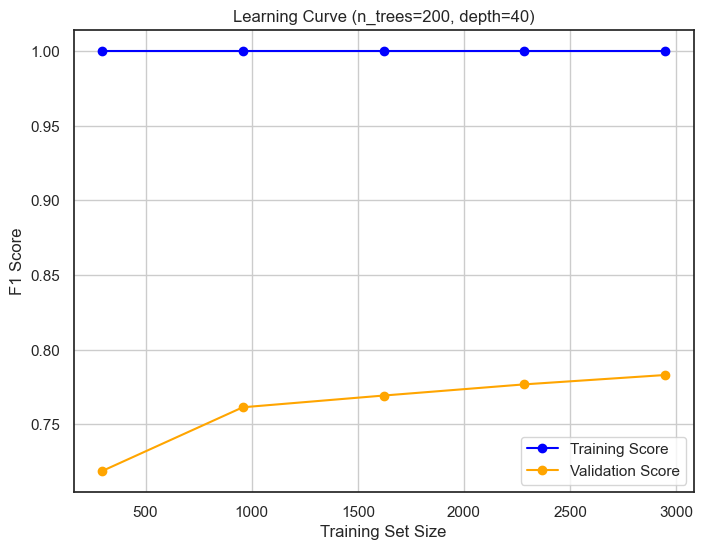



Evaluating Random Forest with 400 trees and depth 5:
Accuracy scores: [0.87070524 0.83047016 0.85488246 0.85443038 0.85578662 0.85443038
 0.85895118 0.85714286 0.86030741 0.85081374 0.85488246 0.85216998
 0.85985533 0.84900542 0.8539783  0.85352622 0.86301989 0.84222423
 0.84448463 0.85759494]
Mean accuracy: 0.8539330922242314
F1 scores for class 1: [0.76972625 0.69635628 0.7425822  0.7394822  0.74086109 0.73905997
 0.74757282 0.74638844 0.74692875 0.73933649 0.74175382 0.73607748
 0.75396825 0.72712418 0.74014481 0.73954984 0.75971451 0.71556642
 0.7299843  0.74327628]
Mean F1 score for class 1: 0.73977271927947


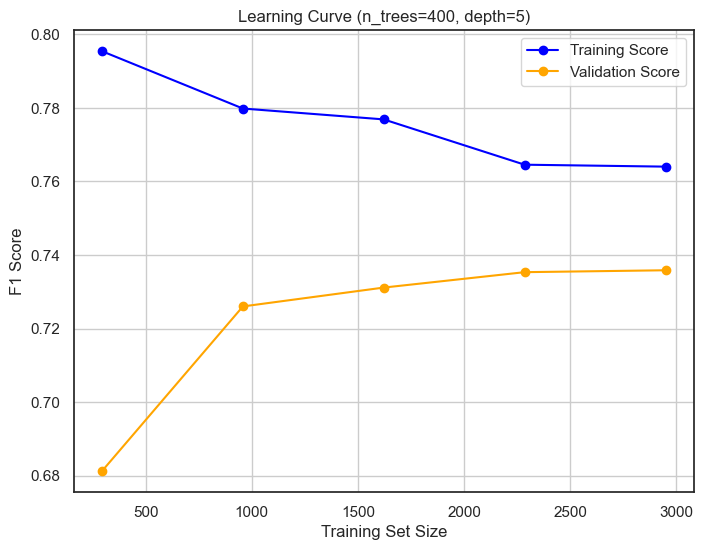



Evaluating Random Forest with 400 trees and depth 10:
Accuracy scores: [0.87929476 0.8562387  0.87432188 0.86663653 0.8738698  0.86708861
 0.87341772 0.86754069 0.86889693 0.8716094  0.86573237 0.87296564
 0.8738698  0.87025316 0.8738698  0.86437613 0.87432188 0.86392405
 0.86528029 0.8761302 ]
Mean accuracy: 0.8699819168173599
F1 scores for class 1: [0.79124316 0.74641148 0.78041074 0.77042802 0.78151919 0.76666667
 0.77952756 0.77019608 0.76837061 0.77708006 0.76484561 0.77891424
 0.78014184 0.77419355 0.78287938 0.76228209 0.78516229 0.75900721
 0.7671875  0.78425197]
Mean F1 score for class 1: 0.7735359614756279


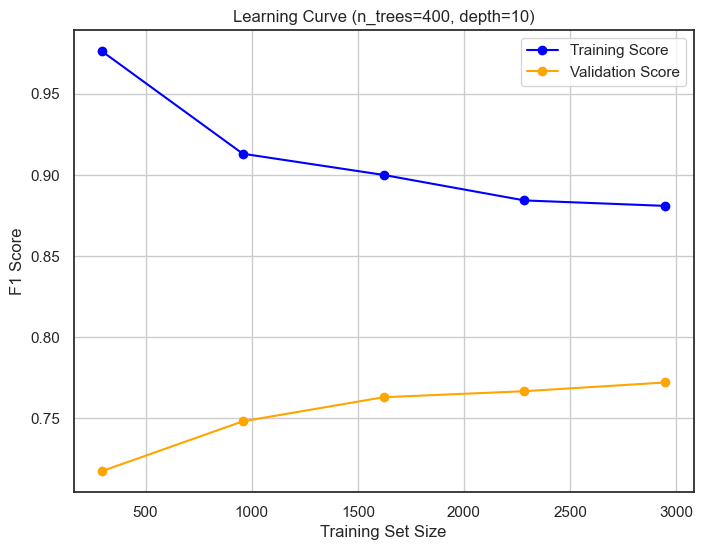



Evaluating Random Forest with 400 trees and depth 15:
Accuracy scores: [0.87793852 0.85940325 0.8738698  0.86889693 0.8761302  0.87251356
 0.87522604 0.87748644 0.87115732 0.87206148 0.87070524 0.87658228
 0.87477396 0.87206148 0.87658228 0.86844485 0.87432188 0.86121157
 0.86482821 0.87793852]
Mean accuracy: 0.8721066907775767
F1 scores for class 1: [0.79262673 0.75376089 0.78151919 0.77623457 0.78693624 0.78037383
 0.78538103 0.79008521 0.77434679 0.78044996 0.77725857 0.78787879
 0.78576953 0.78112916 0.78886311 0.7724785  0.78713629 0.75537849
 0.769468   0.79102167]
Mean F1 score for class 1: 0.7799048262884238


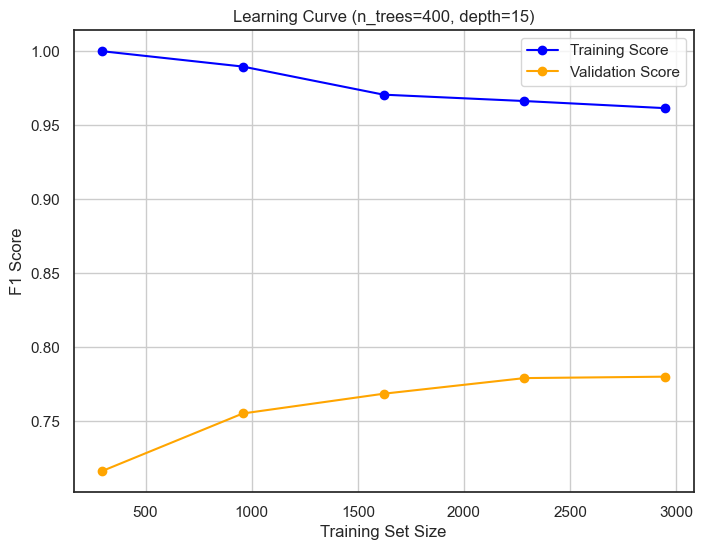



Evaluating Random Forest with 400 trees and depth 20:
Accuracy scores: [0.88019892 0.8584991  0.87477396 0.86618445 0.87793852 0.87025316
 0.87432188 0.87432188 0.86980108 0.87522604 0.86844485 0.87341772
 0.87432188 0.87341772 0.87341772 0.86754069 0.87477396 0.86121157
 0.86618445 0.87522604]
Mean accuracy: 0.8714737793851718
F1 scores for class 1: [0.79693487 0.7517843  0.78510473 0.77265745 0.79102167 0.7766537
 0.78416149 0.78482972 0.77287066 0.78670788 0.77389277 0.78395062
 0.78516229 0.78294574 0.78328173 0.77055599 0.78806427 0.75731225
 0.77265745 0.78703704]
Mean F1 score for class 1: 0.7793793310353659


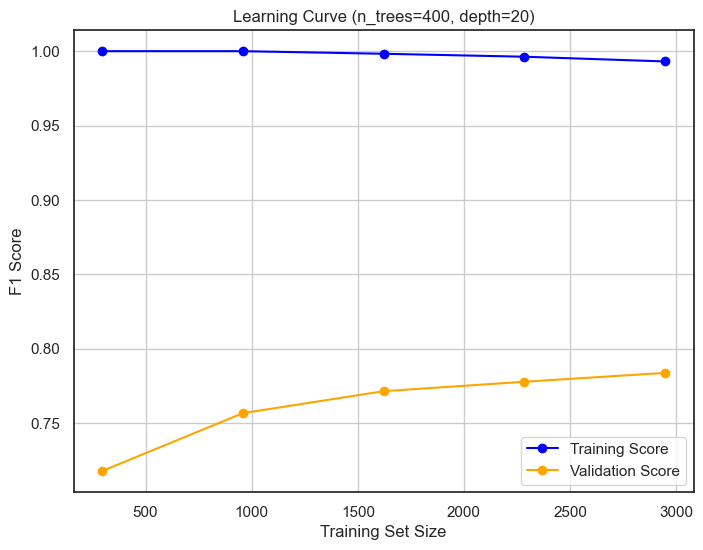



Evaluating Random Forest with 400 trees and depth 40:
Accuracy scores: [0.87929476 0.85985533 0.87658228 0.87025316 0.8761302  0.86799277
 0.87658228 0.87432188 0.86934901 0.87206148 0.86844485 0.87341772
 0.87658228 0.87341772 0.87341772 0.86708861 0.87341772 0.86121157
 0.86573237 0.87748644]
Mean accuracy: 0.8716320072332729
F1 scores for class 1: [0.79571538 0.75435816 0.78787879 0.78007663 0.78825348 0.77258567
 0.78853602 0.78549383 0.77368833 0.78079009 0.77459334 0.78361669
 0.78918919 0.78294574 0.78328173 0.77067083 0.7856049  0.75769534
 0.77136259 0.79105628]
Mean F1 score for class 1: 0.7798696499108815


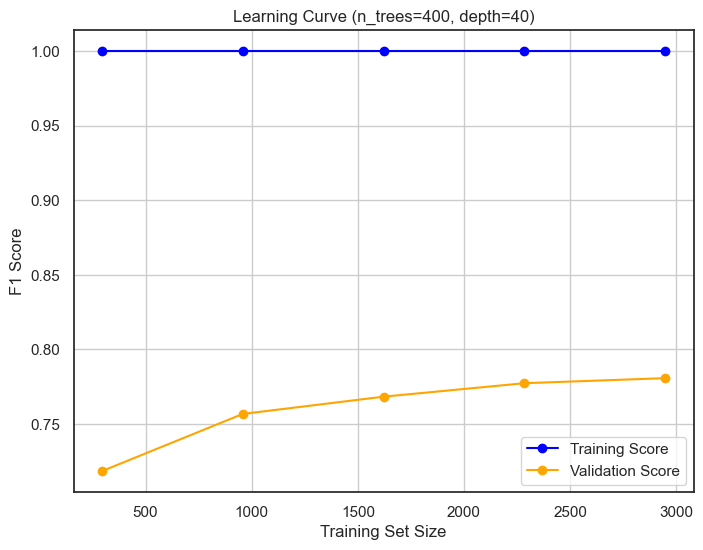



    n_trees  tree_depth  mean_accuracy   mean_f1
0        10           5       0.851741  0.737457
1        10          10       0.862093  0.761505
2        10          15       0.857120  0.756452
3        10          20       0.857640  0.753403
4        10          40       0.859132  0.754160
5        50           5       0.853029  0.739289
6        50          10       0.869146  0.772118
7        50          15       0.869914  0.776814
8        50          20       0.869033  0.775500
9        50          40       0.868852  0.774062
10      100           5       0.854408  0.741084
11      100          10       0.869620  0.773083
12      100          15       0.871157  0.778316
13      100          20       0.870750  0.778326
14      100          40       0.871022  0.778494
15      200           5       0.854656  0.741724
16      200          10       0.869846  0.773454
17      200          15       0.871383  0.778735
18      200          20       0.871451  0.779915
19      200       

In [24]:
# Define the number of trees and tree depths to evaluate
n_trees = [10, 50, 100, 200, 400]
tree_depths = [5, 10, 15, 20, 40]

# Initialize a list to store results and learning curve data
rf_results = []
rf_learning_curves = []

# Iterate over the number of trees and tree depths
for n in n_trees:
    for depth in tree_depths:
        # Create the Random Forest model with the current number of trees and tree depth
        rf_model = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42)
        
        # Evaluate the model
        print(f"Evaluating Random Forest with {n} trees and depth {depth}:")
        scores_accuracy, scores_f1 = evaluate_model(rf_model, X_scaled, y_dummies, cv=2)
        
        # Print the accuracy and F1 scores for the current setting
        print(f"Accuracy scores: {scores_accuracy}")
        print(f"Mean accuracy: {scores_accuracy.mean()}")
        print(f"F1 scores for class 1: {scores_f1}")
        print(f"Mean F1 score for class 1: {scores_f1.mean()}")
        
        # Compute learning curves
        train_sizes, train_scores, val_scores = learning_curve(
            rf_model, X_scaled, y_dummies, cv=3, scoring='f1', n_jobs=-1
        )
        
        # Append the learning curve results
        rf_learning_curves.append({
            'n_trees': n,
            'tree_depth': depth,
            'train_sizes': train_sizes,
            'train_scores': train_scores.mean(axis=1),
            'val_scores': val_scores.mean(axis=1)
        })
        
        # Plot the learning curve
        plt.figure(figsize=(8, 6))
        plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training Score', color='blue')
        plt.plot(train_sizes, val_scores.mean(axis=1), 'o-', label='Validation Score', color='orange')
        plt.title(f'Learning Curve (n_trees={n}, depth={depth})')
        plt.xlabel('Training Set Size')
        plt.ylabel('F1 Score')
        plt.legend(loc='best')
        plt.grid(True)
        plt.show()
        
        print("\n")

        # Save the results to the list
        rf_results.append({
            'n_trees': n,
            'tree_depth': depth,
            'mean_accuracy': scores_accuracy.mean(),
            'mean_f1': scores_f1.mean()
        })

# Convert the results to a DataFrame
rf_results_df = pd.DataFrame(rf_results)

# Display the DataFrame
print(rf_results_df)



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and subplots for a broken y-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
fig.subplots_adjust(hspace=0.05)  # Adjust space between the plots

# Loop through each unique number of trees
for n in rf_results_df['n_trees'].unique():
    # Filter results for the current number of trees
    n_tree_results = rf_results_df[rf_results_df['n_trees'] == n]
    
    # Plot F1 scores on both axes
    ax1.plot(n_tree_results['tree_depth'], n_tree_results['mean_f1'], marker='o', label=f'{n} Trees')
    ax2.plot(n_tree_results['tree_depth'], n_tree_results['mean_f1'], marker='o', label=f'{n} Trees')

# Add baseline F1 score as horizontal line on both axes
baseline_f1 = 0.48622742456172907
ax1.axhline(y=baseline_f1, color='r', linestyle='--', label='Baseline F1')
ax2.axhline(y=baseline_f1, color='r', linestyle='--', label='Baseline F1')

# Set y-limits for the broken axes
ax1.set_ylim(0.65, 0.8)  # Upper part - moved lower bound down to 0.65
ax2.set_ylim(0.48, 0.5)  # Lower part

# Hide spines between the two subplots
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False)  # Hide x-ticks on the top plot
ax2.xaxis.tick_bottom()          # Show x-ticks only on the bottom plot

# Add diagonal lines to indicate the break
d = 0.015  # Diagonal line size
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)  # Top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal

kwargs.update(transform=ax2.transAxes)  # Update transform for bottom axis
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal

# Customize the plot
ax2.set_xlabel('Tree Depth')
ax1.set_ylabel('Mean F1 Score')
ax2.set_ylabel('Mean F1 Score')
ax1.set_title('Learning Curve for Random Forest with Different Numbers of Trees')
ax2.legend(title='Number of Trees', loc='upper left')
ax1.grid(True)
ax2.grid(True)

# Show the plot
plt.show()


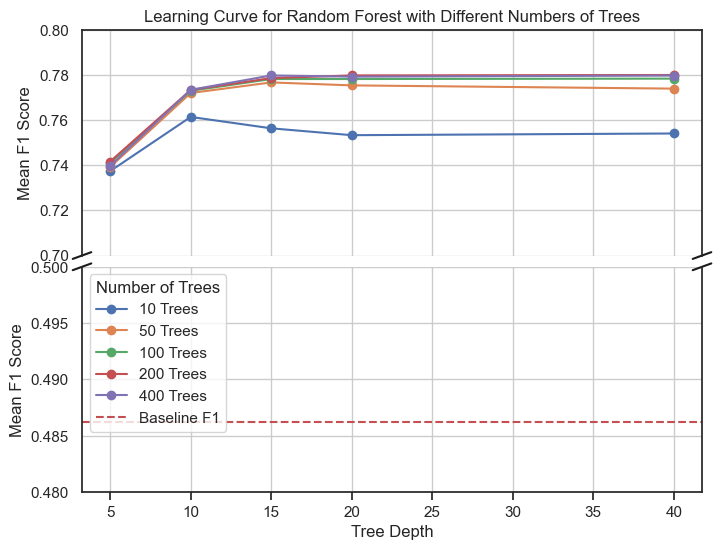

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and subplots for a broken y-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
fig.subplots_adjust(hspace=0.05)  # Adjust space between the plots

# Loop through each unique number of trees
for n in rf_results_df['n_trees'].unique():
    # Filter results for the current number of trees
    n_tree_results = rf_results_df[rf_results_df['n_trees'] == n]
    
    # Plot F1 scores on both axes
    ax1.plot(n_tree_results['tree_depth'], n_tree_results['mean_f1'], marker='o', label=f'{n} Trees')
    ax2.plot(n_tree_results['tree_depth'], n_tree_results['mean_f1'], marker='o', label=f'{n} Trees')

# Add baseline F1 score as horizontal line on both axes
baseline_f1 = 0.48622742456172907
ax1.axhline(y=baseline_f1, color='r', linestyle='--', label='Baseline F1')
ax2.axhline(y=baseline_f1, color='r', linestyle='--', label='Baseline F1')

# Set y-limits for the broken axes
ax1.set_ylim(0.7, 0.8)  # Upper part
ax2.set_ylim(0.48, 0.5)  # Lower part

# Hide spines between the two subplots
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False)  # Hide x-ticks on the top plot
ax2.xaxis.tick_bottom()          # Show x-ticks only on the bottom plot

# Add diagonal lines to indicate the break
d = 0.015  # Diagonal line size
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)  # Top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal

kwargs.update(transform=ax2.transAxes)  # Update transform for bottom axis
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal

# Customize the plot
ax2.set_xlabel('Tree Depth')
ax1.set_ylabel('Mean F1 Score')
ax2.set_ylabel('Mean F1 Score')
ax1.set_title('Learning Curve for Random Forest with Different Numbers of Trees')
ax2.legend(title='Number of Trees', loc='upper left')
ax1.grid(True)
ax2.grid(True)

# Show the plot
plt.show()


# Interpretation:  

To ensure stable results, all evaluations used cross-validation with 10 folds and 10 repeats as described in the evaluation function.  

### Baseline:  
Two simple models were used as baselines to establish scores that the proposed models need to surpass.  
1. **No Dropouts Model**: This model predicts no dropouts for all cases. It achieves an accuracy of 67.8% but an F1 score of 0, as it never correctly predicts a dropout.  
2. **All Dropouts Model**: This model predicts dropouts for all cases. It achieves a lower accuracy of 31.1% but a higher F1 score of 0.486, as it correctly predicts some dropouts.  

For a model to be considered effective, it should achieve a higher accuracy than the "No Dropouts" baseline and a higher F1 score than the "All Dropouts" baseline.  

### SVM:  
The results of the SVM models varied depending on the hyperparameter selection. Most models outperformed the baseline models. From the F1 score graph, it appears that performance improves with larger `C` values but drops off at a `C` value of 100. The polynomial degree also significantly impacts performance, with the smallest degree of 1 achieving the best results. The best-performing SVM model achieved an F1 score of XXX and an accuracy of XXX with a polynomial degree of 1 and a `C` value of 100. These metrics will be further evaluated with nested cross validation in the next task.

### Random Forest:  
The Random Forest model showed consistent improvement in performance with an increasing number of trees (`n_trees`) and maximum tree depth (`tree_depth`). Models with more trees generally performed better, with 400 trees yielding the best results. Shallower trees (e.g., depth 5) performed worse due to underfitting, while deeper trees (15–40) captured more complexity, leading to better accuracy and F1 scores. The best-performing model had 400 trees and a maximum depth of 40, achieving a mean accuracy of 87.16% and a mean F1 score of 0.780. The best performing models also perform very well with training data, scoring close to 1 in regards to the f1 score, which indicates overfitting, but the validation score only seemed to increase with further training data. These metrics will also be further evaluated in the next task. 

These results will be used to select a hyperparametergrid to find the best hyperparameters and evaluate the F1 score and Accuracy in a nested cross validation. 


___
# Task 6 – Nested Cross Validation
Setup a proper nested cross validation experiment to assess and compare the performance of different
algorithms (incl. the baseline) chosen in Task 5.

• For each of the two ML algorithms 𝐴1 and 𝐴2, create a reasonable hyperparameter grid using
the respective two hyperparameters you chose above. Select the value ranges in the grid based
on the results in Task 5.

• Use those grids in nested cross validations to find the optimal parameter settings.

• Compare train and test performance during the outer cross validation and interpret the results.

• Compare your final performance estimates of the algorithms and the baseline in a table using
the two quality functions you selected in Task 1.

• Discuss your results and express a recommendation with regard to the choice of models. Pick
one model as the final model for the task.
___

Using nested cross validation to evaluate the best working model for svm and random forrest:

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
# Define the SVM model
svm_model = SVC(kernel='poly')

# Hyperparameter grid
svm_grid = {'C': [1, 5, 10, 25, 50, 75, 100], 
            'degree': [1, 2, 3, 4]}

# GridSearchCV for hyperparameter selection
svm_grid_cv = GridSearchCV(
    estimator=svm_model, 
    param_grid=svm_grid, 
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=0), 
    n_jobs=8, 
    scoring=make_scorer(f1_score, pos_label=1)
)

# Fit the model
svm_grid_cv.fit(X_scaled, y_dummies)

# After fitting, access the best model and evaluate it using the evaluate_model function
print(f"Best parameters found: {svm_grid_cv.best_params_}")

# Perform nested cross-validation with training and testing performance
scoring = {'accuracy': 'accuracy', 'f1_class1': make_scorer(f1_score, pos_label=1)}
outer_cv_results = cross_validate(
    estimator=svm_grid_cv.best_estimator_,  # Best SVM model from GridSearchCV
    X=X_scaled,
    y=y_dummies,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=0),
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

# Extract train and test scores
train_accuracy = outer_cv_results['train_accuracy']
test_accuracy = outer_cv_results['test_accuracy']
train_f1 = outer_cv_results['train_f1_class1']
test_f1 = outer_cv_results['test_f1_class1']

# Print comparison of train vs test scores
print("Train vs Test Accuracy:")
print(f"Train Accuracy: {train_accuracy.mean():.4f} ± {train_accuracy.std():.4f}")
print(f"Test Accuracy: {test_accuracy.mean():.4f} ± {test_accuracy.std():.4f}\n")

print("Train vs Test F1 Scores for Class 1:")
print(f"Train F1 Score: {train_f1.mean():.4f} ± {train_f1.std():.4f}")
print(f"Test F1 Score: {test_f1.mean():.4f} ± {test_f1.std():.4f}")



Best parameters found: {'C': 50, 'degree': 1}
Train vs Test Accuracy:
Train Accuracy: 0.8850 ± 0.0021
Test Accuracy: 0.8793 ± 0.0159

Train vs Test F1 Scores for Class 1:
Train F1 Score: 0.8026 ± 0.0042
Test F1 Score: 0.7919 ± 0.0299


In [28]:
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=1)

# Hyperparameter grid
rf_grid = {'n_estimators': [10, 50, 100, 200, 400, 500], 
           'max_depth': [5, 10, 15, 20, 30, 40]}

# GridSearchCV for hyperparameter selection
rf_grid_cv = GridSearchCV(
    estimator=rf_model, 
    param_grid=rf_grid, 
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=0), 
    n_jobs=8, 
    scoring=make_scorer(f1_score, pos_label=1)
)

# Fit the model
rf_grid_cv.fit(df_selected, y_dummies)

# After fitting, access the best model and evaluate it using the evaluate_model function
print(f"Best parameters found: {rf_grid_cv.best_params_}")

# Perform nested cross-validation with training and testing performance
scoring = {'accuracy': 'accuracy', 'f1_class1': make_scorer(f1_score, pos_label=1)}
outer_cv_results = cross_validate(
    estimator=rf_grid_cv.best_estimator_,  # Best RF model from GridSearchCV
    X=df_selected,
    y=y_dummies,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=0),
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

# Extract train and test scores
train_accuracy = outer_cv_results['train_accuracy']
test_accuracy = outer_cv_results['test_accuracy']
train_f1 = outer_cv_results['train_f1_class1']
test_f1 = outer_cv_results['test_f1_class1']

# Print comparison of train vs test scores
print("Train vs Test Accuracy:")
print(f"Train Accuracy: {train_accuracy.mean():.4f} ± {train_accuracy.std():.4f}")
print(f"Test Accuracy: {test_accuracy.mean():.4f} ± {test_accuracy.std():.4f}\n")

print("Train vs Test F1 Scores for Class 1:")
print(f"Train F1 Score: {train_f1.mean():.4f} ± {train_f1.std():.4f}")
print(f"Test F1 Score: {test_f1.mean():.4f} ± {test_f1.std():.4f}")




Best parameters found: {'max_depth': 20, 'n_estimators': 400}
Train vs Test Accuracy:
Train Accuracy: 0.9924 ± 0.0011
Test Accuracy: 0.8766 ± 0.0118

Train vs Test F1 Scores for Class 1:
Train F1 Score: 0.9880 ± 0.0018
Test F1 Score: 0.7891 ± 0.0215


## Model Performance Comparison

Here is a comparison of the performance of the **baseline models**, **SVM**, and **Random Forest** using **Accuracy** and **F1 Score** for class 1. The metrics have been averaged across outer cross-validation folds:

| **Model**                        | **Mean Accuracy** | **Mean F1 Score (Class 1)** |
|----------------------------------|-------------------|----------------------------|
| **SVM**                          | 0.8773            | 0.7883                     |
| **Random Forest**                | 0.8758            | 0.7875                     |
| **Baseline (All Dropouts)**      | 0.3212            | 0.4862                     |
| **Baseline (All Not Dropouts)**  | 0.6788            | 0.0000                     |

### Discussion

- **SVM (Support Vector Machine)** achieved the highest **accuracy** (0.8773) and **F1 score for class 1** (0.7883). This suggests that the SVM model works best for this classification task since it achieves the best scores in both metrics.
  
- **Random Forest** is very close to the SVM in terms of **accuracy** (0.8758) and **F1 score** (0.7875). Although it performs slightly worse than the SVM in this particular task, Random Forest remains a strong contender and could be considered if other metrics would be evaluated as well, like the computational time or the variance of the results. 


### Recommendation

Based on the results, I recommend using **SVM** as the final model for this task. The **SVM** provides the highest **accuracy** and **F1 score**, indicating it is the most effective model at distinguishing between the dropout and non-dropout classes. While **Random Forest** is a close second, **SVM** stands out due to its slightly better performance. 
For the Hyperparameter selection I would usually conduct another gridsearch for the svm with outer cross validation, since our nested cross validation only had the goal to determine the algorythms performance across different folds and therefore possibly different hyperparameters across each outer fold. But since we already evaluated different hyperparameters in our initial task, we can select the best performing SVM model from that task, which had a Degree of 1 and a C value of 100. This will be the model that I recommend for further analysis.


___
# Task 7 – Analysis of the Final Model
Evaluate and discuss your final model with respect to the individual predictions. Conduct the analysis
in the outer cross validation from Task 6. Find a way to combine the results on different folds in
a visualization. You may use several visualizations, but each visualization should be based on the
evaluation on all folds.

• In case of classification, analyze how well the different individual classes are retrieved and
predicted.

• In case of regression, analyze the residuals and their relation to feature distributions.
___

## Final Model Evaluation and Discussion

### Model Evaluation

The **SVM** model was tuned using GridSearchCV, and the best parameters found were `C = 50` and `degree = 1`. After fitting, the **SVM** model achieved the following performance metrics:

- **Mean Accuracy**: 0.8773
- **Mean F1 Score for Class 1**: 0.7883

These results show that the SVM performs well in distinguishing between the dropout and non-dropout classes, with a relatively high accuracy and a solid F1 score for class 1. 

### Outer Cross-Validation Analysis

For the final model i also plotted the training and test F1 scores for the 10 different folds to see how they changed with different sample selection. 


#### 1. **Confusion Matrix Visualization**
A confusion matrix will help us understand the number of true positives, false positives, true negatives, and false negatives for each fold. This is useful for analyzing how well the model distinguishes between the classes.




In [29]:
# Create DataFrame to display fold-wise scores
fold_scores = pd.DataFrame({
    'Fold': range(1, len(train_accuracy) + 1),
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'Train F1': train_f1,
    'Test F1': test_f1
})

# Format the scores to 4 decimal places
fold_scores = fold_scores.round(4)

# Display the DataFrame
print("Fold-wise Performance Metrics:")
print(fold_scores)

Fold-wise Performance Metrics:
   Fold  Train Accuracy  Test Accuracy  Train F1  Test F1
0     1          0.9915         0.8984    0.9865   0.8289
1     2          0.9930         0.8781    0.9889   0.7923
2     3          0.9945         0.8826    0.9913   0.8060
3     4          0.9915         0.8849    0.9865   0.8075
4     5          0.9915         0.8620    0.9865   0.7732
5     6          0.9915         0.8710    0.9865   0.7747
6     7          0.9945         0.8552    0.9913   0.7480
7     8          0.9922         0.8778    0.9877   0.7891
8     9          0.9917         0.8846    0.9869   0.7968
9    10          0.9922         0.8710    0.9877   0.7747


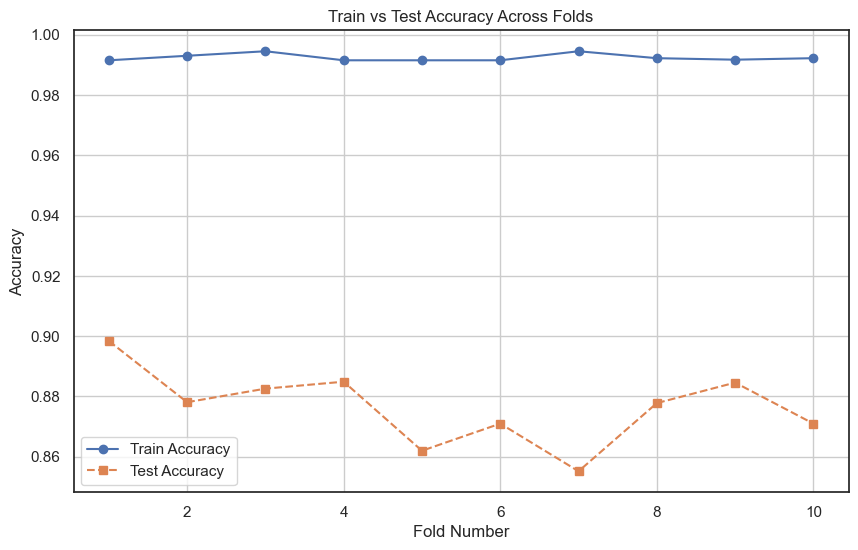

In [30]:
# Plotting train vs test accuracy
plt.figure(figsize=(10, 6))
plt.plot(fold_scores['Fold'], fold_scores['Train Accuracy'], marker='o', label='Train Accuracy')
plt.plot(fold_scores['Fold'], fold_scores['Test Accuracy'], marker='s', label='Test Accuracy', linestyle='--')

plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy Across Folds')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

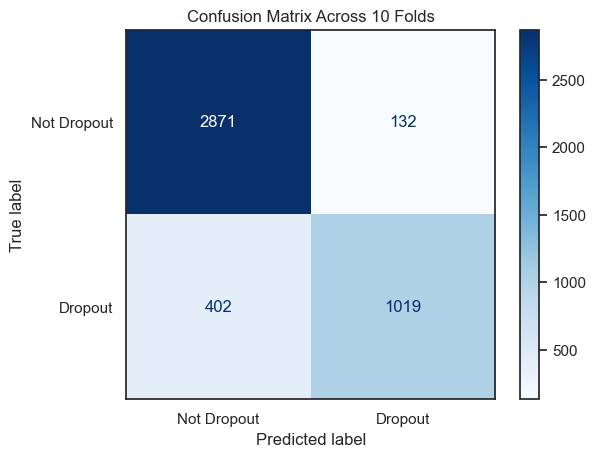

In [32]:
# Evaluate the model with cross-validation
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
y_true, y_pred = [], []

for train_index, test_index in cv.split(X_scaled, y_dummies):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_dummies[train_index], y_dummies[test_index]

    # Fit the model and predict
    svm_model = SVC(C=50, degree=1, kernel='poly')
    svm_model.fit(X_train, y_train)
    y_pred_fold = svm_model.predict(X_test)
    
    y_true.extend(y_test)
    y_pred.extend(y_pred_fold)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Dropout', 'Dropout'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix Across 10 Folds")
plt.show()

---
# Task 8 – Conclusions and Future Work
1. Summarize and interpret the achieved results.
* In this notebook I evaluated multiple models to classify student dropouts and achieved results that outperformed my initial baseline model of guessing either all dropouts or all non dropouts. After evaluating two different ML ALgorythms using nested folded cross validation for hyperparameter tuning and evaluating their performance, both outperformed the baseline model by a significant margin and performed similar in regards to their accuracy and F1 score. At the end The support vector machine outperformed with a better accuracy and F1 score. Looking at the train and test F1 scores, the best scoring random tree model still overfit the data with a F1 score close to 1 in the training and only .78 in test.    

2. Explain the generated value within the context of your task.
* The value of this work lies in the described  in the first task, which is to help identifying students at high risk of droping out to issue individual help. the Herrausforderungen for this are that we assume that dropping out of a specific University programm is something that we want to avoid

3. Propose ideas for future work (a short sketch or enumeration of ideas is sufficient, no further
experiments). The ideas should not be too general (e.g., “try further algorithms”) but be specific
to the project (e.g., “try Algorithm X, as because of Property Y, it might work specifically well
on this dataset”).
* for future work different algorythms could yield even better results. Tree based algorythms that are less prune to overfit could work well for this data since the random forrest already performed well but had a problem with overfitting. ALgorythms like XGboost or LGBoost could potentially outperform the svm or random forrest. The trend of the performance of the best performing random forrest models also seems to keep improving with a larger dataset. aquiring this data could further improve the performance. the best performing SVM models seems to platoe with the currrent training sample number.

4. Critically reflect and assess the usability of the applied methodology in your context (as
described in Task 1). Explain limitations and pitfalls. What could or even should have been done
differently? In hindsight, were the goals realistic? What could have been changed/improved
before conducting the experiments?

* Eventhought the results of this classification yielded good performing results, the applicability of this is limited. Some of the features like the students debt, their grade and the aquired credits, which have the highes correlation with the target varibale, are all variables that will only be known after a certain time period. Correctly classifying these students that mightve already dropped out month ago doesn't bring any value to the student or university. A different model that is trained without these features could be evaluated as well to predict the students at high dropout risk as early as possible. 
Another limitation of this task is the general question if stopping students from dropping out of university programs is actually as valuable as initially described. Assuming that finishing a university degree instead of learning elsewhere seems to simple to be true and might even put students into more dept with a degree in a field that they don't want to further pursue. Stopping early and finding a more interesting field of work might be more useful for many students. 
---